In [1]:
import math
from logging import debug

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import copy
from math import sqrt,ceil

from PIL.ImageColor import colormap
from scipy.stats import linregress
import libraries as lib

C:\Users\bono\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Incapa Blad 300 N, 15 
#Piloot: 
#Teun van den Elzen (72kg) (11:0
#Tristan Ploeger (80kg) (13:30-2
#Tomas Kramer (70kg) (20:00- 

#20240709_Anse_stroomafwaarts/0002 - 20240709T070429 8h16m21s 51.701km Trevoux - Givors
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Schroef Fee (Chopped Tips) 
#Folder: 
#Folders zijn weer begonnen vanaf mapje 1 vanwege het vervangen van de sd-kaart. 
#0002: Gaat het water in <--- 
#0003: Na opnieuw opstarten. 
#Piloot: 
#Tristan Ploeger (80kg) 
#Jonathan Meuleman (70kg) 

#20240708_Valence/0231 - 20240708T111346 8h9m54s 47.648km La Voulte-sur-Rhone - Tournon-sur-Rhone
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Schroef Fee (Chopped Tips) 
#Piloot: 
#Ruben Jans (77kg) 
#Bastiaan Buurman (75kg) 

#20240714_Limburg-Nijmegen\0028 - 20240714T061924 15h2m29s 148.594km Bunde - Lent
#Configuratie: 
#Roze roer 
#Motortype: 30100/13 (NR 6) 
#@i=7 (NR E) 
#Schakeling: Driehoek 
#Schroef: Incapa Blad 300 N, 15 m/s 
#Piloot: 
#Felix van Beusekom (78kg) (10:20-14:40) 
#Dennis van den Berg (73kg) (14:40-~17:30) 
#Jonathan Gessel (76kg) (~17:30-21:20) 

In [3]:
directory = "../../../../OneDrive - HvA/Logfiles/SOLAR/2024/2024-10-24_sleeptest/0056 - 20241024T115530 1h25m5s 12.315km De Rijp - Uitgeest - De Rijp"
directory2 = "../../../../OneDrive - HvA/Logfiles/SOLAR/2024/2024-10-24_sleeptest/0058 - 20241024T182042 7m15s 0.022km Aalsmeer"
directory4 = "../../../../OneDrive - HvA/Logfiles/SOLAR/2024/2024-10-24_sleeptest/0057 - 20241024T143305 48m25s 2.925km De Rijp - Uitgeest - De Rijp"

directory3 = "../../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240713_Huy-Limburg/0026 - 20240713T080342 14h37m16s 145.044km Durnal - Heel"
directory5 = '../../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240714_Limburg-Nijmegen/0028 - 20240714T061924 15h2m29s 148.594km Bunde - Lent'
directory6 = '../../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240708_Valence/0231 - 20240708T111346 8h9m54s 47.648km La Voulte-sur-Rhone - Tournon-sur-Rhone'
directory7 = '../../../../OneDrive - HvA/Logfiles/SOLAR/2024/20240707_20240715_terugvaart/20240709_Anse_stroomafwaarts/0002 - 20240709T070429 8h16m21s 51.701km Trevoux - Givors'

result1 = lib.DataUitzoekenGui(directory)
result2 = lib.DataUitzoekenGui(directory2)
result3 = lib.DataUitzoekenGui(directory3)
result4 = lib.DataUitzoekenGui(directory4)
result5 = lib.DataUitzoekenGui(directory5)
result6 = lib.DataUitzoekenGui(directory6)
result7 = lib.DataUitzoekenGui(directory7)

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '1_Master_08_05.csv', '2_MPPT_0_05_05.csv', '3_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_05_05.csv', '3_MPPT_05_07.csv', '4_MPPT…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_05.csv', '3_MPPT_1_05_05.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

SelectMultiple(description='Bestanden:', options=('0_Bus.csv', '2_MPPT_0_05_07.csv', '3_MPPT_1_05_07.csv', '4_…

Button(button_style='success', description='Bestanden Laden', icon='check', style=ButtonStyle(), tooltip='Klik…

Label(value='')

In [148]:
# Na het laden van de bestanden en het klikken op de knop
# Controleer of 'merged_df' in result zit
if 'merged_df' in result1:
    merged_df1 = result1['merged_df'].copy()
    merged_df2 = result2['merged_df'].copy()
    merged_df3 = result3['merged_df'].copy()
    merged_df4 = result4['merged_df'].copy()
    merged_df5 = result5['merged_df'].copy()
    merged_df6 = result6['merged_df'].copy()
    merged_df7 = result7['merged_df'].copy()
    # Gebruik merged_df zoals je wilt
else:
    print("De data is nog niet geladen.")

In [149]:
#filter de eerste 100 waarders erut
merged_df1 = merged_df1.iloc[0:-1]
#lib.plot_trajectory_map(merged_df1['1_Latitude'].dropna(), merged_df1['1_Longitude'].dropna(), merged_df1['1_Snelheid over de grond in km/h'].dropna())

In [150]:
#lib.plot_trajectory_map(merged_df4['1_Latitude'].dropna(), merged_df4['1_Longitude'].dropna(), merged_df4['1_Snelheid over de grond in km/h'].dropna())

In [151]:
merged_df3 = merged_df3.iloc[10000:-5000]

merged_df5 = merged_df5.iloc[20000:-7000]

merged_df6 = merged_df6[merged_df6['1_Latitude'] != 0]
merged_df6 = merged_df6[merged_df6['1_Longitude'] != 0]
merged_df6 = merged_df6.iloc[9000:-100]

merged_df7 = merged_df7[merged_df7['1_Latitude'] != 0]
merged_df7 = merged_df7[merged_df7['1_Longitude'] != 0]
merged_df7 = merged_df7.iloc[100:-3000]


In [152]:
#lib.plot_trajectory_map(merged_df3['1_Latitude'].dropna(), merged_df3['1_Longitude'].dropna(), merged_df3['1_Snelheid over de grond in km/h'].dropna())

In [153]:
#reken het vermogen van de vesc uit door spanning keer stroom te doen
merged_df3['2_VESC input vermogen (W)'] = merged_df3['2_VESC input current (A)'] * merged_df3['2_VESC input voltage (V)']
merged_df5['2_VESC input vermogen (W)'] = merged_df5['2_VESC input current (A)'] * merged_df5['2_VESC input voltage (V)']
merged_df6['2_VESC input vermogen (W)'] = merged_df6['2_VESC input current (A)'] * merged_df6['2_VESC input voltage (V)']
merged_df7['2_VESC input vermogen (W)'] = merged_df7['2_VESC input current (A)'] * merged_df7['2_VESC input voltage (V)']

In [154]:
def filter_dataframe(
    df,
    speed_col='1_Snelheid tenopzichte van het water in Kilometers per uur',
    power_col='2_VESC input vermogen (W)',
    ground_speed_col='1_Snelheid over de grond in km/h',
    max_speed=20,
    min_speed=0.1,
    max_power=2000,
    min_power=10,
    accel_range=0.001,
    schalend_snelheid_accel=True
):
    # Filter op snelheid
    df = df[(df[speed_col] < max_speed) & (df[speed_col] > min_speed)]
    
    # Filter op vermogen
    df = df[(df[power_col] < max_power) & (df[power_col] > min_power)]
    
    # Filter op versnelling
    accel_diff = df[ground_speed_col].diff()
    
    # Filter lage snelheden uit om deling door zeer kleine waarden te voorkomen
    df = df[df[ground_speed_col] > 0.1]
    
    if schalend_snelheid_accel:
        scaled_filter = accel_diff / df[ground_speed_col].replace(0, 1e-6)
        # Voeg grenzen toe voor extreme geschaalde waarden
        df = df[(scaled_filter < accel_range) & (scaled_filter > -accel_range)]
    else:
        df = df[(accel_diff < accel_range) & (accel_diff > -accel_range)]
    
    return df


In [155]:
def filter_with_bins(df, speed_col, value_col, bins=20, lower_percentile=10, upper_percentile=90):
    """
    Filter data by dividing into bins and removing outliers based on percentiles.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to filter.
        speed_col (str): Column name for the variable used to create bins (e.g., speed).
        value_col (str): Column name for the variable to filter (e.g., power).
        bins (int): Number of bins to divide the data into. Default is 20.
        lower_percentile (float): Lower percentile for filtering (e.g., 10 for 10%). Default is 10.
        upper_percentile (float): Upper percentile for filtering (e.g., 90 for top 10%). Default is 90.
    
    Returns:
        pd.DataFrame: Filtered DataFrame.
    """
    # Create bins based on the speed column
    df['bin'] = pd.cut(df[speed_col], bins=bins, labels=False)
    
    # Initialize an empty list to store filtered data
    filtered_data = []
    
    # Process each bin separately
    for bin_id in range(bins):
        bin_data = df[df['bin'] == bin_id]
        if not bin_data.empty:
            # Calculate lower and upper percentile thresholds
            lower_thresh = np.percentile(bin_data[value_col], lower_percentile)
            upper_thresh = np.percentile(bin_data[value_col], upper_percentile)
            
            # Filter data within thresholds
            bin_filtered = bin_data[(bin_data[value_col] >= lower_thresh) & (bin_data[value_col] <= upper_thresh)]
            filtered_data.append(bin_filtered)
    
    # Concatenate filtered data from all bins
    filtered_df = pd.concat(filtered_data, ignore_index=True)
    
    # Drop the temporary 'bin' column
    filtered_df.drop(columns=['bin'], inplace=True)
    
    return filtered_df

In [156]:
merged_df3_schalend = filter_dataframe(merged_df3.copy(),max_power=1500,schalend_snelheid_accel=True)

merged_df3_niet_schalend = filter_dataframe(merged_df3.copy(),max_power=1500,schalend_snelheid_accel=False)

<ipython-input-154-8cbff1f14974>:28: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(scaled_filter < accel_range) & (scaled_filter > -accel_range)]
<ipython-input-154-8cbff1f14974>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(accel_diff < accel_range) & (accel_diff > -accel_range)]


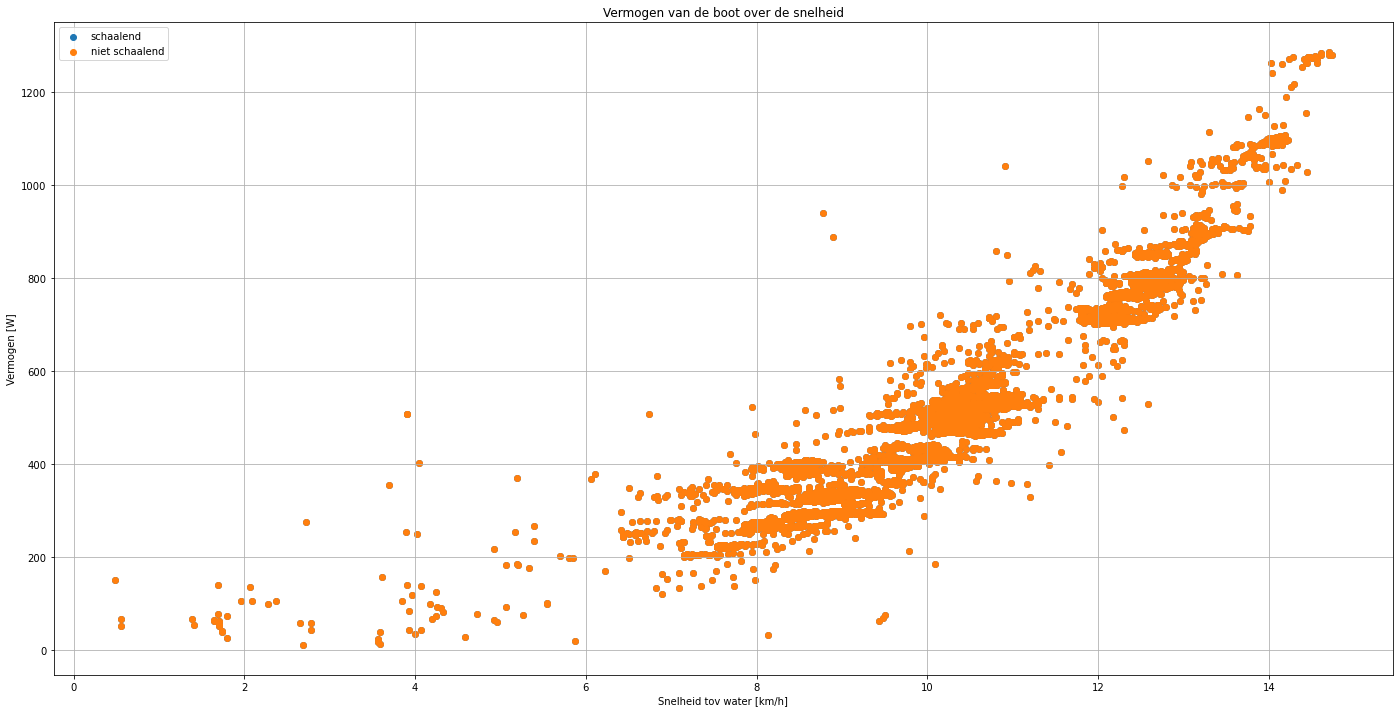

In [157]:
#plot schalende factor en niet schalende acceleratie factor
plt.figure(figsize=(24, 12))
plt.scatter(merged_df3_schalend['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy(),merged_df3_schalend['2_VESC input vermogen (W)'].to_numpy(),label='schaalend')
plt.scatter(merged_df3_niet_schalend['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy(),merged_df3_niet_schalend['2_VESC input vermogen (W)'].to_numpy(),label='niet schaalend')
plt.xlabel('Snelheid tov water [km/h]')
plt.ylabel('Vermogen [W]')
plt.title('Vermogen van de boot over de snelheid')
plt.legend()
plt.grid(True)
plt.show()

In [120]:
# Opslag voor resultaten
filtered_results = {}

# Loop over percentielen (0% tot 10% aan beide kanten)
for percentile in range(1, 22, 5):  # Van 0% tot 10% in stappen van 2%
    # Maak een subdictionary voor deze percentile
    filtered_results[percentile] = {}
    
    # Loop over aantallen bins (10 tot 100 in stappen van 25)
    for bins in range(50, 201, 25):  # Van 10 tot 100 bins
        filtered_df = filter_with_bins(
            merged_df3_schalend.copy(),
            '1_Snelheid tenopzichte van het water in Kilometers per uur',
            '2_VESC input vermogen (W)',
            bins=bins,
            lower_percentile=percentile,
            upper_percentile=100 - percentile  # Bovengrens aanpassen
        )
        # Sla gefilterde DataFrame op in de dictionary
        filtered_results[percentile][bins] = filtered_df


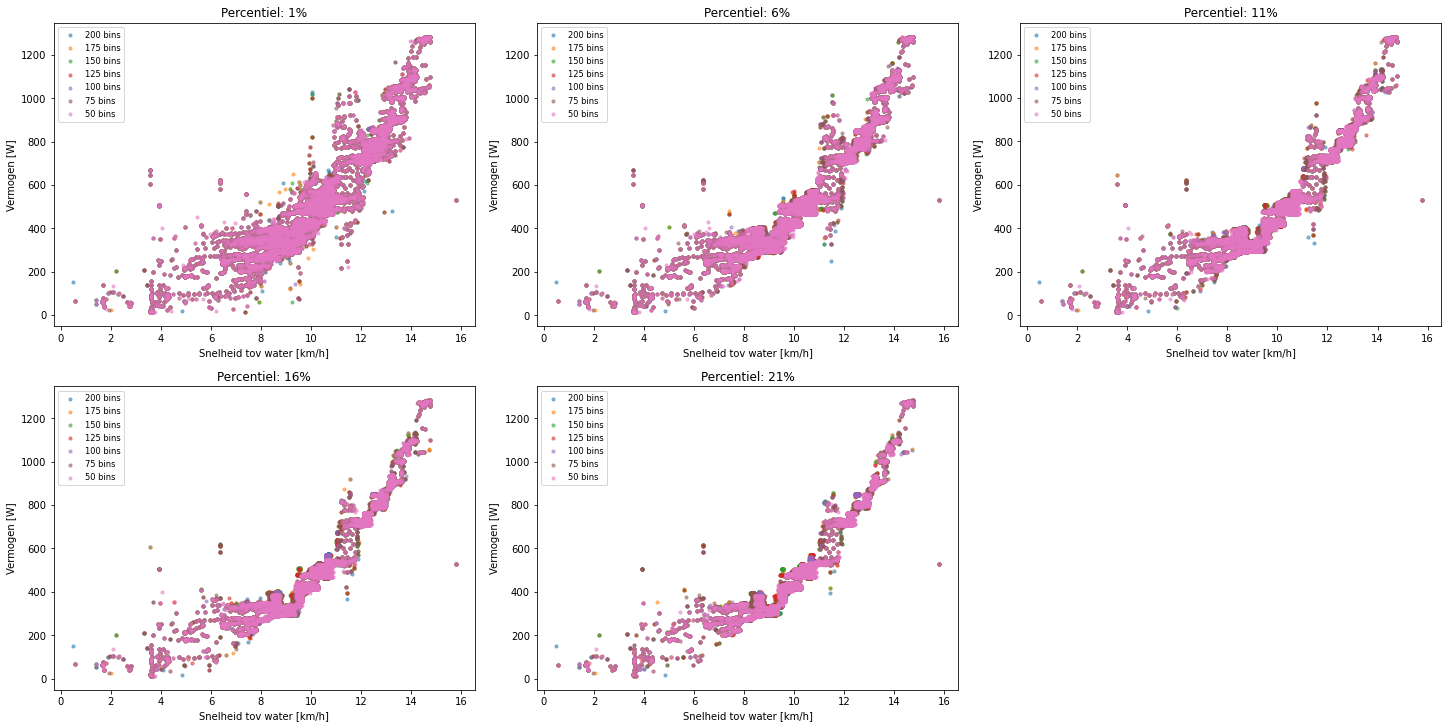

In [121]:
# Instellingen voor subplots (3 kolommen, dynamisch aantal rijen)
n_cols = 3
n_rows = -(-len(filtered_results) // n_cols)  # Rond naar boven

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5), constrained_layout=True)

# Plotten
for i, (percentile, bins_data) in enumerate(filtered_results.items()):
    ax = axes.flat[i]  # Selecteer de subplot op basis van de index
    
    # Sorteer de bins in omgekeerde volgorde
    sorted_bins = sorted(bins_data.keys(), reverse=True)
    
    for bins in sorted_bins:
        filtered_df = bins_data[bins]
        # Scatter plot voor elke combinatie van percentiel en bins
        ax.scatter(
            filtered_df['1_Snelheid tenopzichte van het water in Kilometers per uur'],
            filtered_df['2_VESC input vermogen (W)'],
            label=f'{bins} bins',
            alpha=0.5,
            s=10  # Marker grootte
        )
    
    # Plotinstellingen
    ax.set_title(f'Percentiel: {percentile}%')
    ax.set_xlabel('Snelheid tov water [km/h]')
    ax.set_ylabel('Vermogen [W]')
    ax.legend(fontsize='small')

# Verwijder lege subplots (als er minder plots dan subplots zijn)
for i in range(len(filtered_results), len(axes.flat)):
    fig.delaxes(axes.flat[i])

# Laat de plots zien
plt.show()


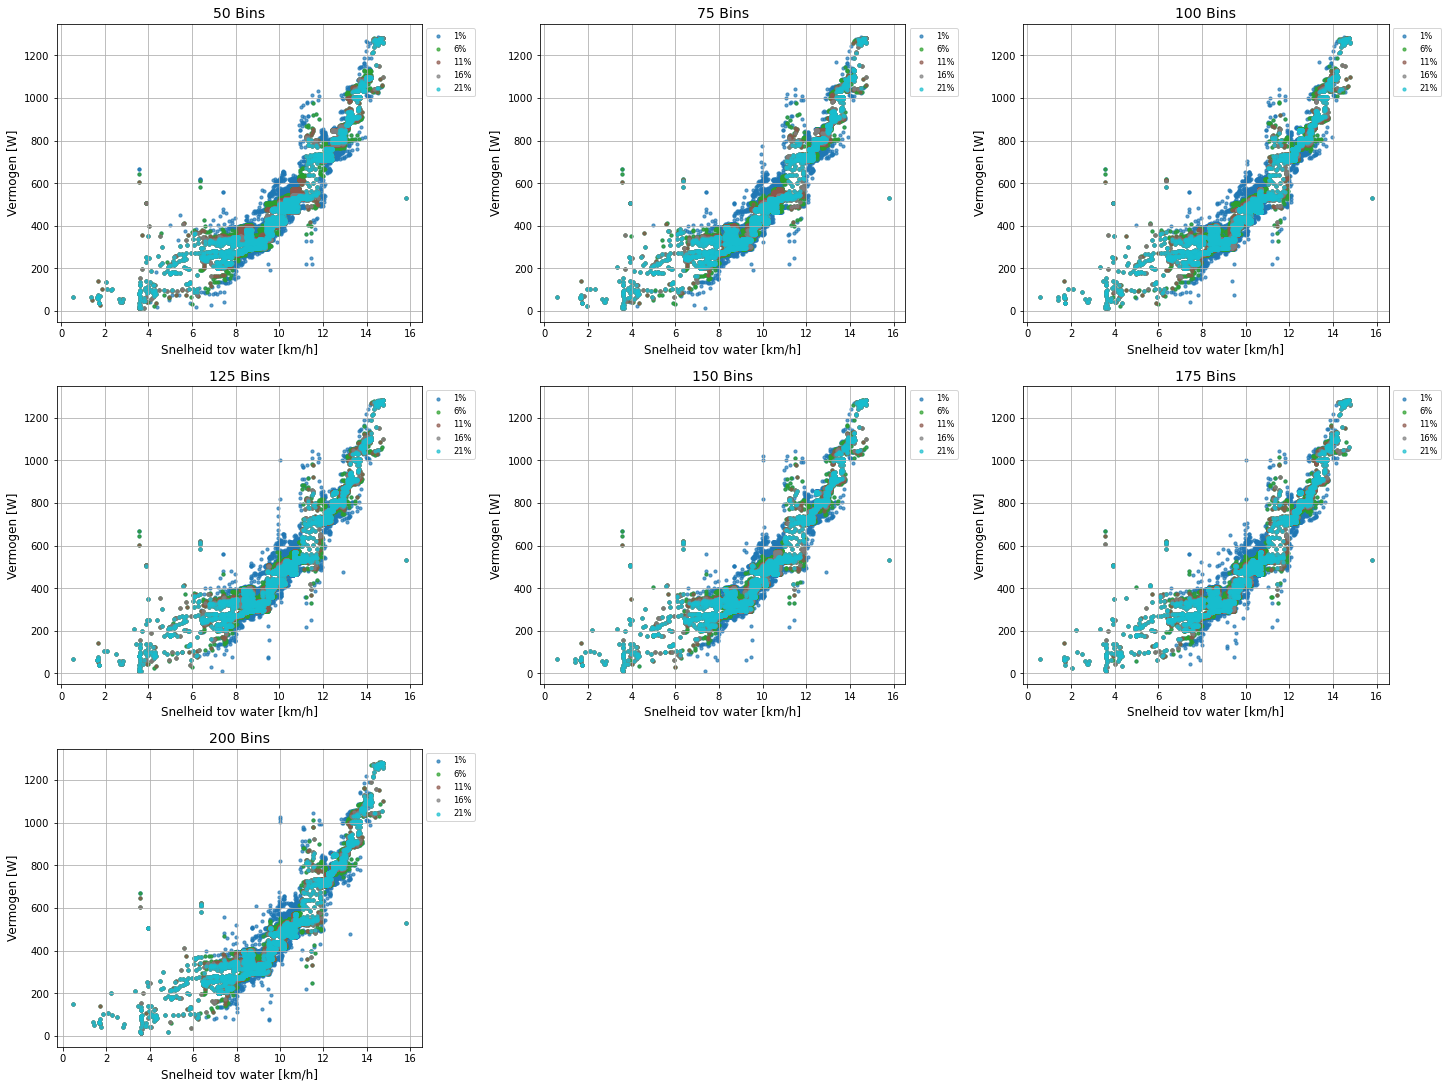

In [122]:
# Instellingen voor subplots (3 kolommen, dynamisch aantal rijen)
n_cols = 3
n_rows = -(-len(next(iter(filtered_results.values()))) // n_cols)  # Dynamisch aantal rijen op basis van bins

# Kies een beter kleurenpalet (bijv. 'tab10' of 'Set2')
color_palette = plt.cm.tab10(np.linspace(0, 1, len(filtered_results)))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5), constrained_layout=True)

# Plotten
for i, bins in enumerate(next(iter(filtered_results.values()))):  # Loop over bins
    ax = axes.flat[i]  # Selecteer de subplot op basis van de index
    
    for j, (percentile, bins_data) in enumerate(filtered_results.items()):  # Loop over percentielen
        filtered_df = bins_data[bins]  # Haal de gefilterde DataFrame op voor de huidige bin
        # Scatter plot voor elke combinatie van bin en percentiel
        ax.scatter(
            filtered_df['1_Snelheid tenopzichte van het water in Kilometers per uur'],
            filtered_df['2_VESC input vermogen (W)'],
            label=f'{percentile}%',
            alpha=0.7,
            s=10,  # Marker grootte
            color=color_palette[j]  # Gebruik verbeterde kleuren
        )
    
    # Plotinstellingen
    ax.set_title(f'{bins} Bins', fontsize=14)
    ax.set_xlabel('Snelheid tov water [km/h]', fontsize=12)
    ax.set_ylabel('Vermogen [W]', fontsize=12)
    ax.legend(fontsize='small', loc='upper left', bbox_to_anchor=(1, 1))  # Legenda buiten de plot
    ax.grid(True)

# Verwijder lege subplots (als er minder plots dan subplots zijn)
for i in range(len(next(iter(filtered_results.values()))), len(axes.flat)):
    fig.delaxes(axes.flat[i])

# Laat de plots zien
plt.show()


In [84]:
print(len(merged_df3_schalend))
print(len(merged_df3_niet_schalend))

26817
16011


In [132]:
# filterout when the acceleration is below 0.1 en hoger dan -0.1
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'].diff() < 0.1]
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'].diff() > -0.1]

#wanneer snelheid onder de 0 is filteren
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'] > 0]

#filter alles voor 10:00 uur eruit 'Tijd [UUMMSS]' en na 10:40
merged_df1 = merged_df1[merged_df1['1_Tijd'] > 100000]

In [133]:
merged_df1['2_Loadcell in N'] = (merged_df1['2_Processed median-filtered sample waarde van de load cell ADC'] * -2.471 * 10**-5)
merged_df2['2_Loadcell in N'] = (merged_df2['2_Processed median-filtered sample waarde van de load cell ADC'] * -2.471 * 10**-5)
merged_df4['2_Loadcell in N'] = (merged_df4['2_Processed median-filtered sample waarde van de load cell ADC'] * -2.471 * 10**-5)
merged_df1['2_Loadcell in kg'] = merged_df1['2_Loadcell in N'] / 9.81
merged_df2['2_Loadcell in kg'] = merged_df2['2_Loadcell in N'] / 9.81
merged_df4['2_Loadcell in kg'] = merged_df4['2_Loadcell in N'] / 9.81

# Snelheid omzetten van km/h naar m/s
merged_df1["speed_water_ms"] = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy() / 3.6
merged_df4["speed_water_ms"] = merged_df4['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy() / 3.6
merged_df3["speed_water_ms"] = merged_df3['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy() / 3.6

merged_df1['speed_grond_ms'] = merged_df1['1_Snelheid over de grond in km/h'].to_numpy() / 3.6
merged_df4['speed_grond_ms'] = merged_df4['1_Snelheid over de grond in km/h'].to_numpy() / 3.6
merged_df3['speed_grond_ms'] = merged_df3['1_Snelheid over de grond in km/h'].to_numpy() / 3.6

# Vermogen berekenen
merged_df1['Vermogen aantrekking'] = merged_df1['2_Loadcell in N'].to_numpy() * merged_df1["speed_water_ms"]
merged_df4['Vermogen aantrekking'] = merged_df4['2_Loadcell in N'].to_numpy() * merged_df4["speed_water_ms"]

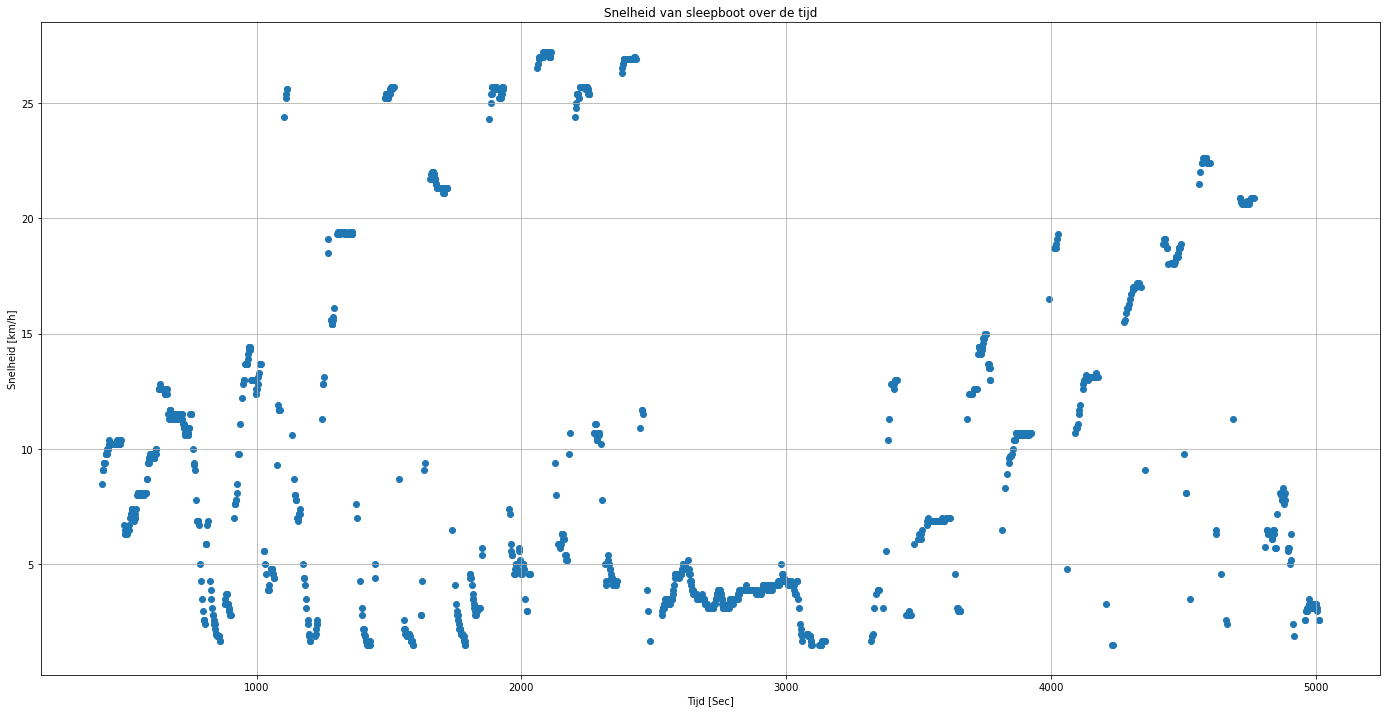

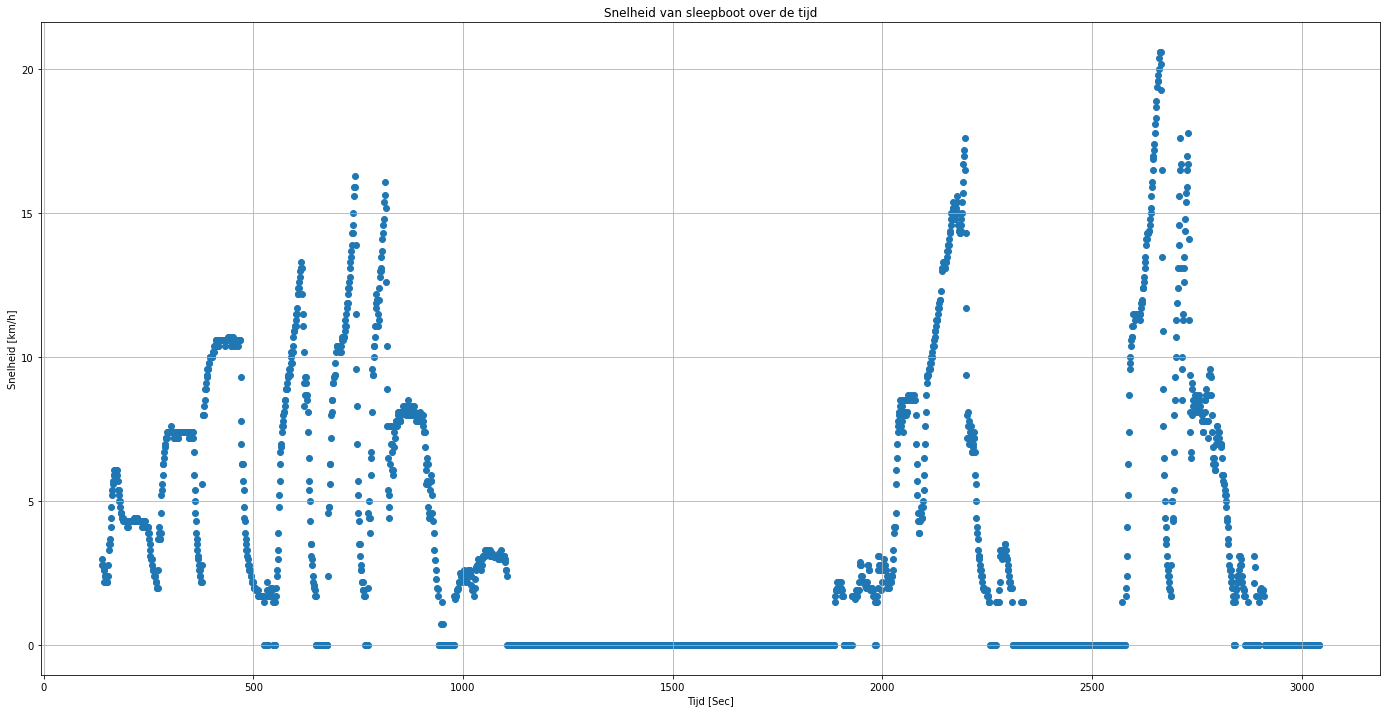

In [134]:
#plot van merged4 de snelheid tov van de grond over de tijd
plt.figure(figsize=(24, 12))
plt.scatter(merged_df1['1_Dataloggertijd, in s'].to_numpy(),merged_df1['1_Snelheid over de grond in km/h'].to_numpy())
plt.xlabel('Tijd [Sec]')
plt.ylabel('Snelheid [km/h]')
plt.title('Snelheid van sleepboot over de tijd')
plt.grid(True)
plt.show()

#plot van merged4 de snelheid tov van de grond over de tijd
plt.figure(figsize=(24, 12))
plt.scatter(merged_df4['1_Dataloggertijd, in s'].to_numpy(),merged_df4['1_Snelheid over de grond in km/h'].to_numpy())
plt.xlabel('Tijd [Sec]')
plt.ylabel('Snelheid [km/h]')
plt.title('Snelheid van sleepboot over de tijd')
plt.grid(True)
plt.show()

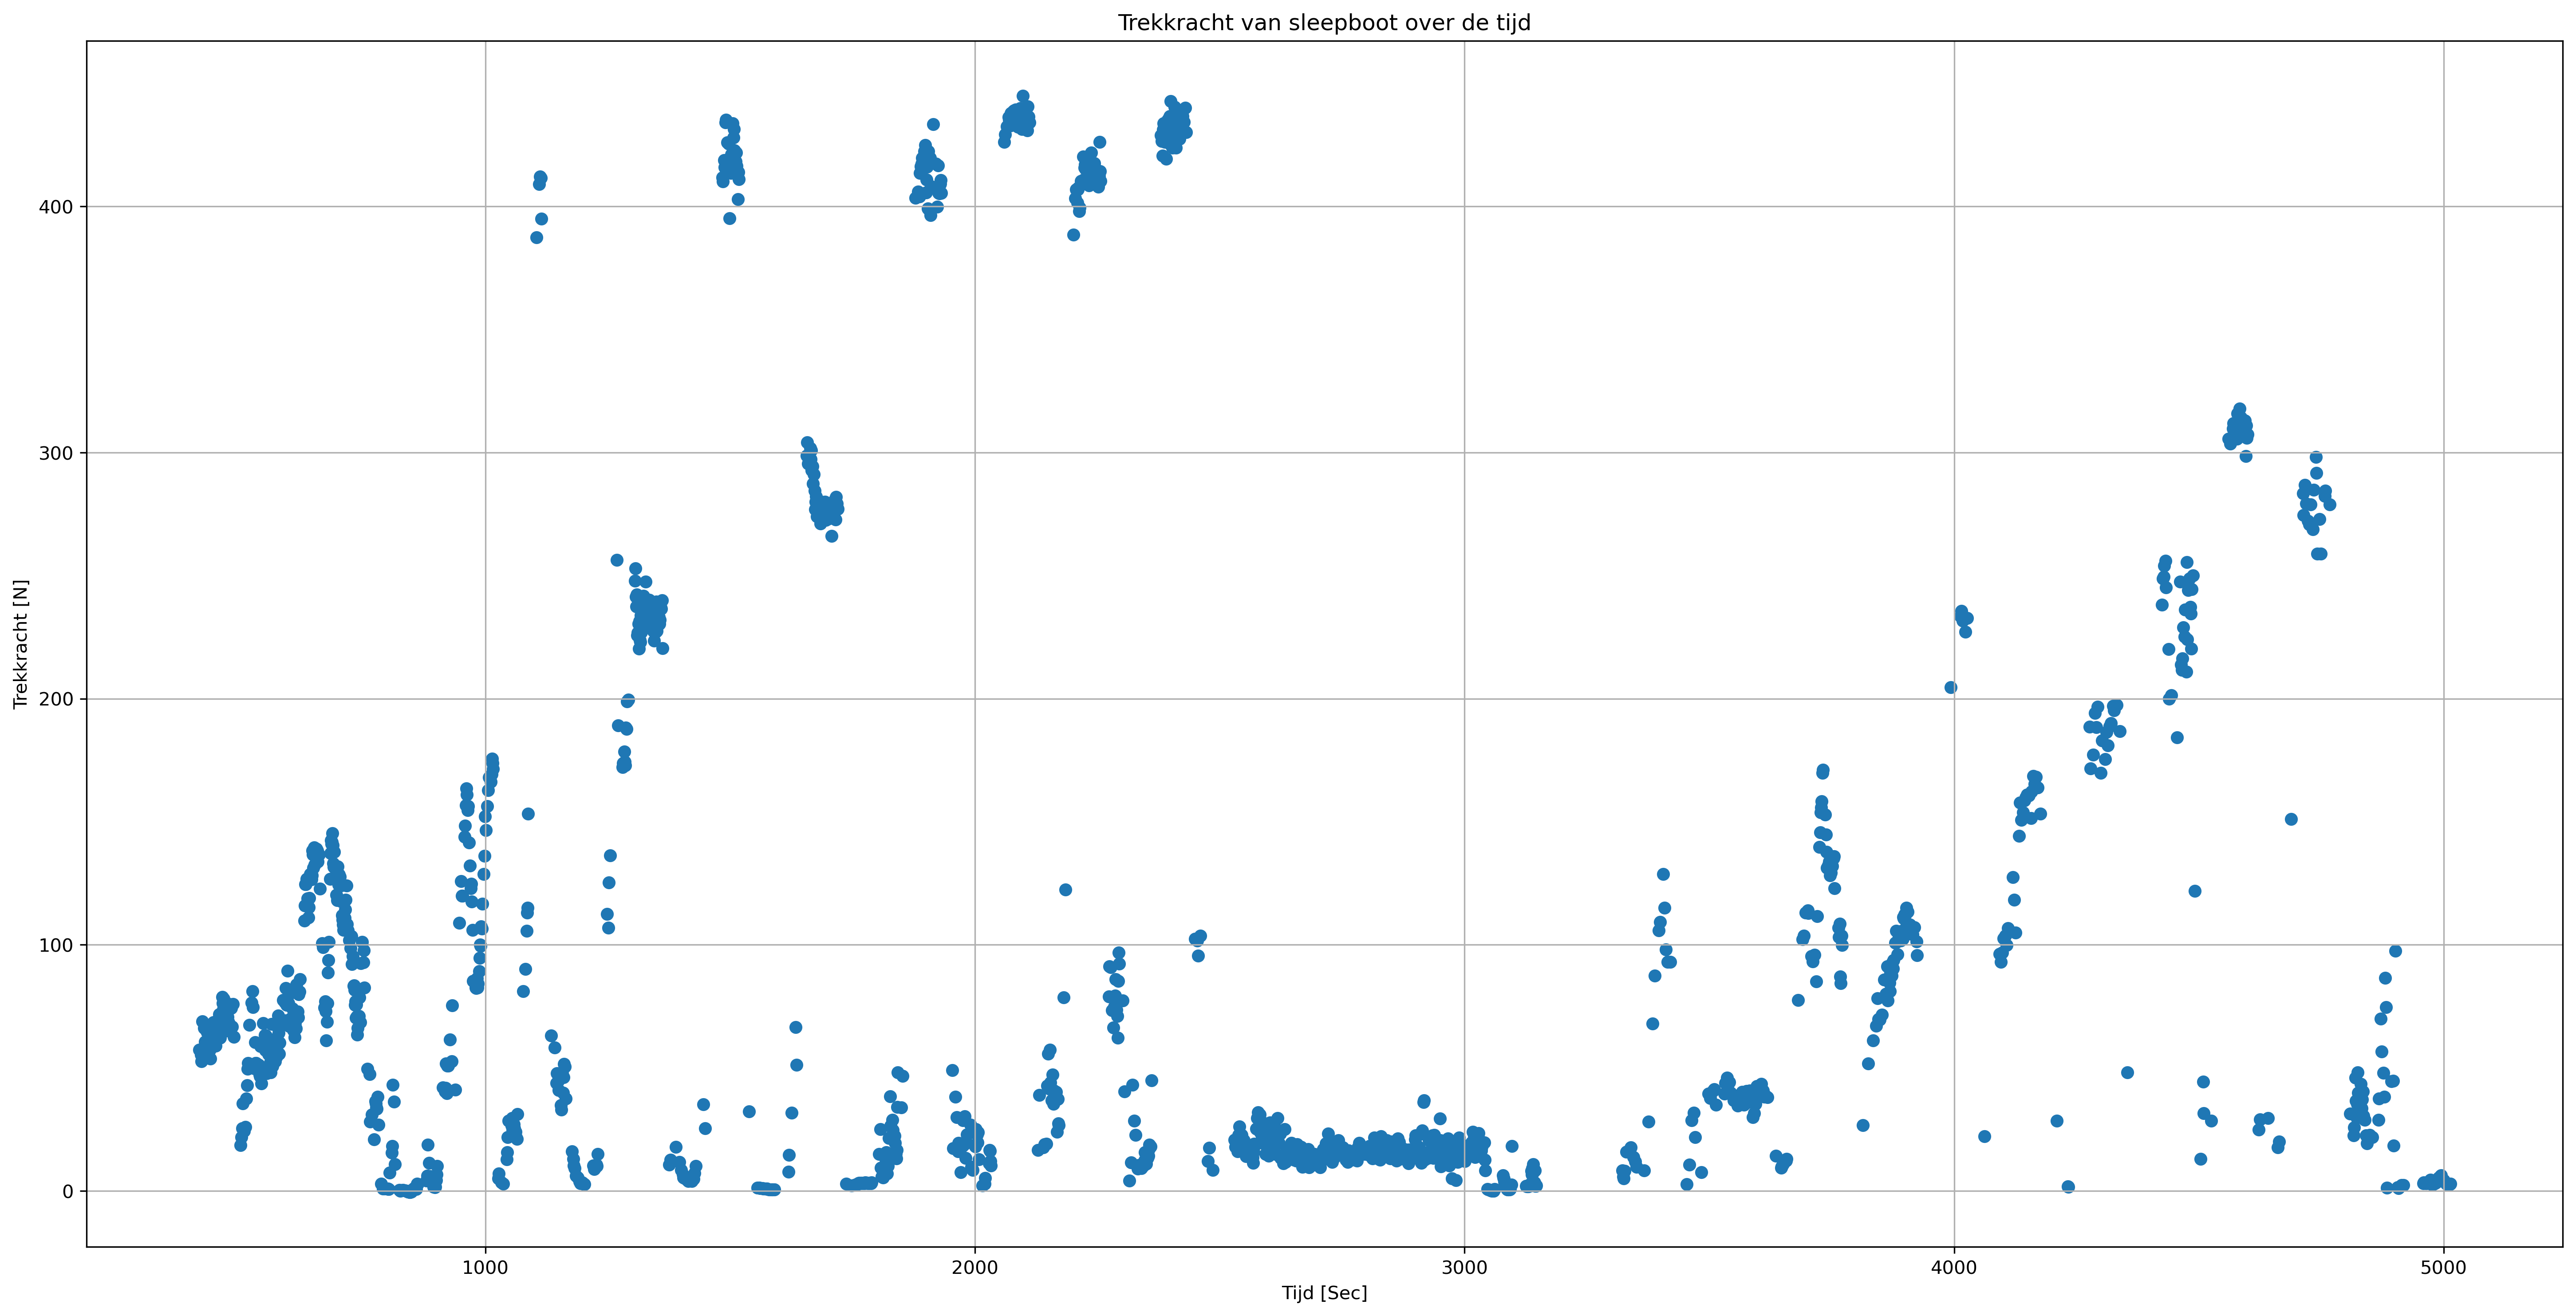

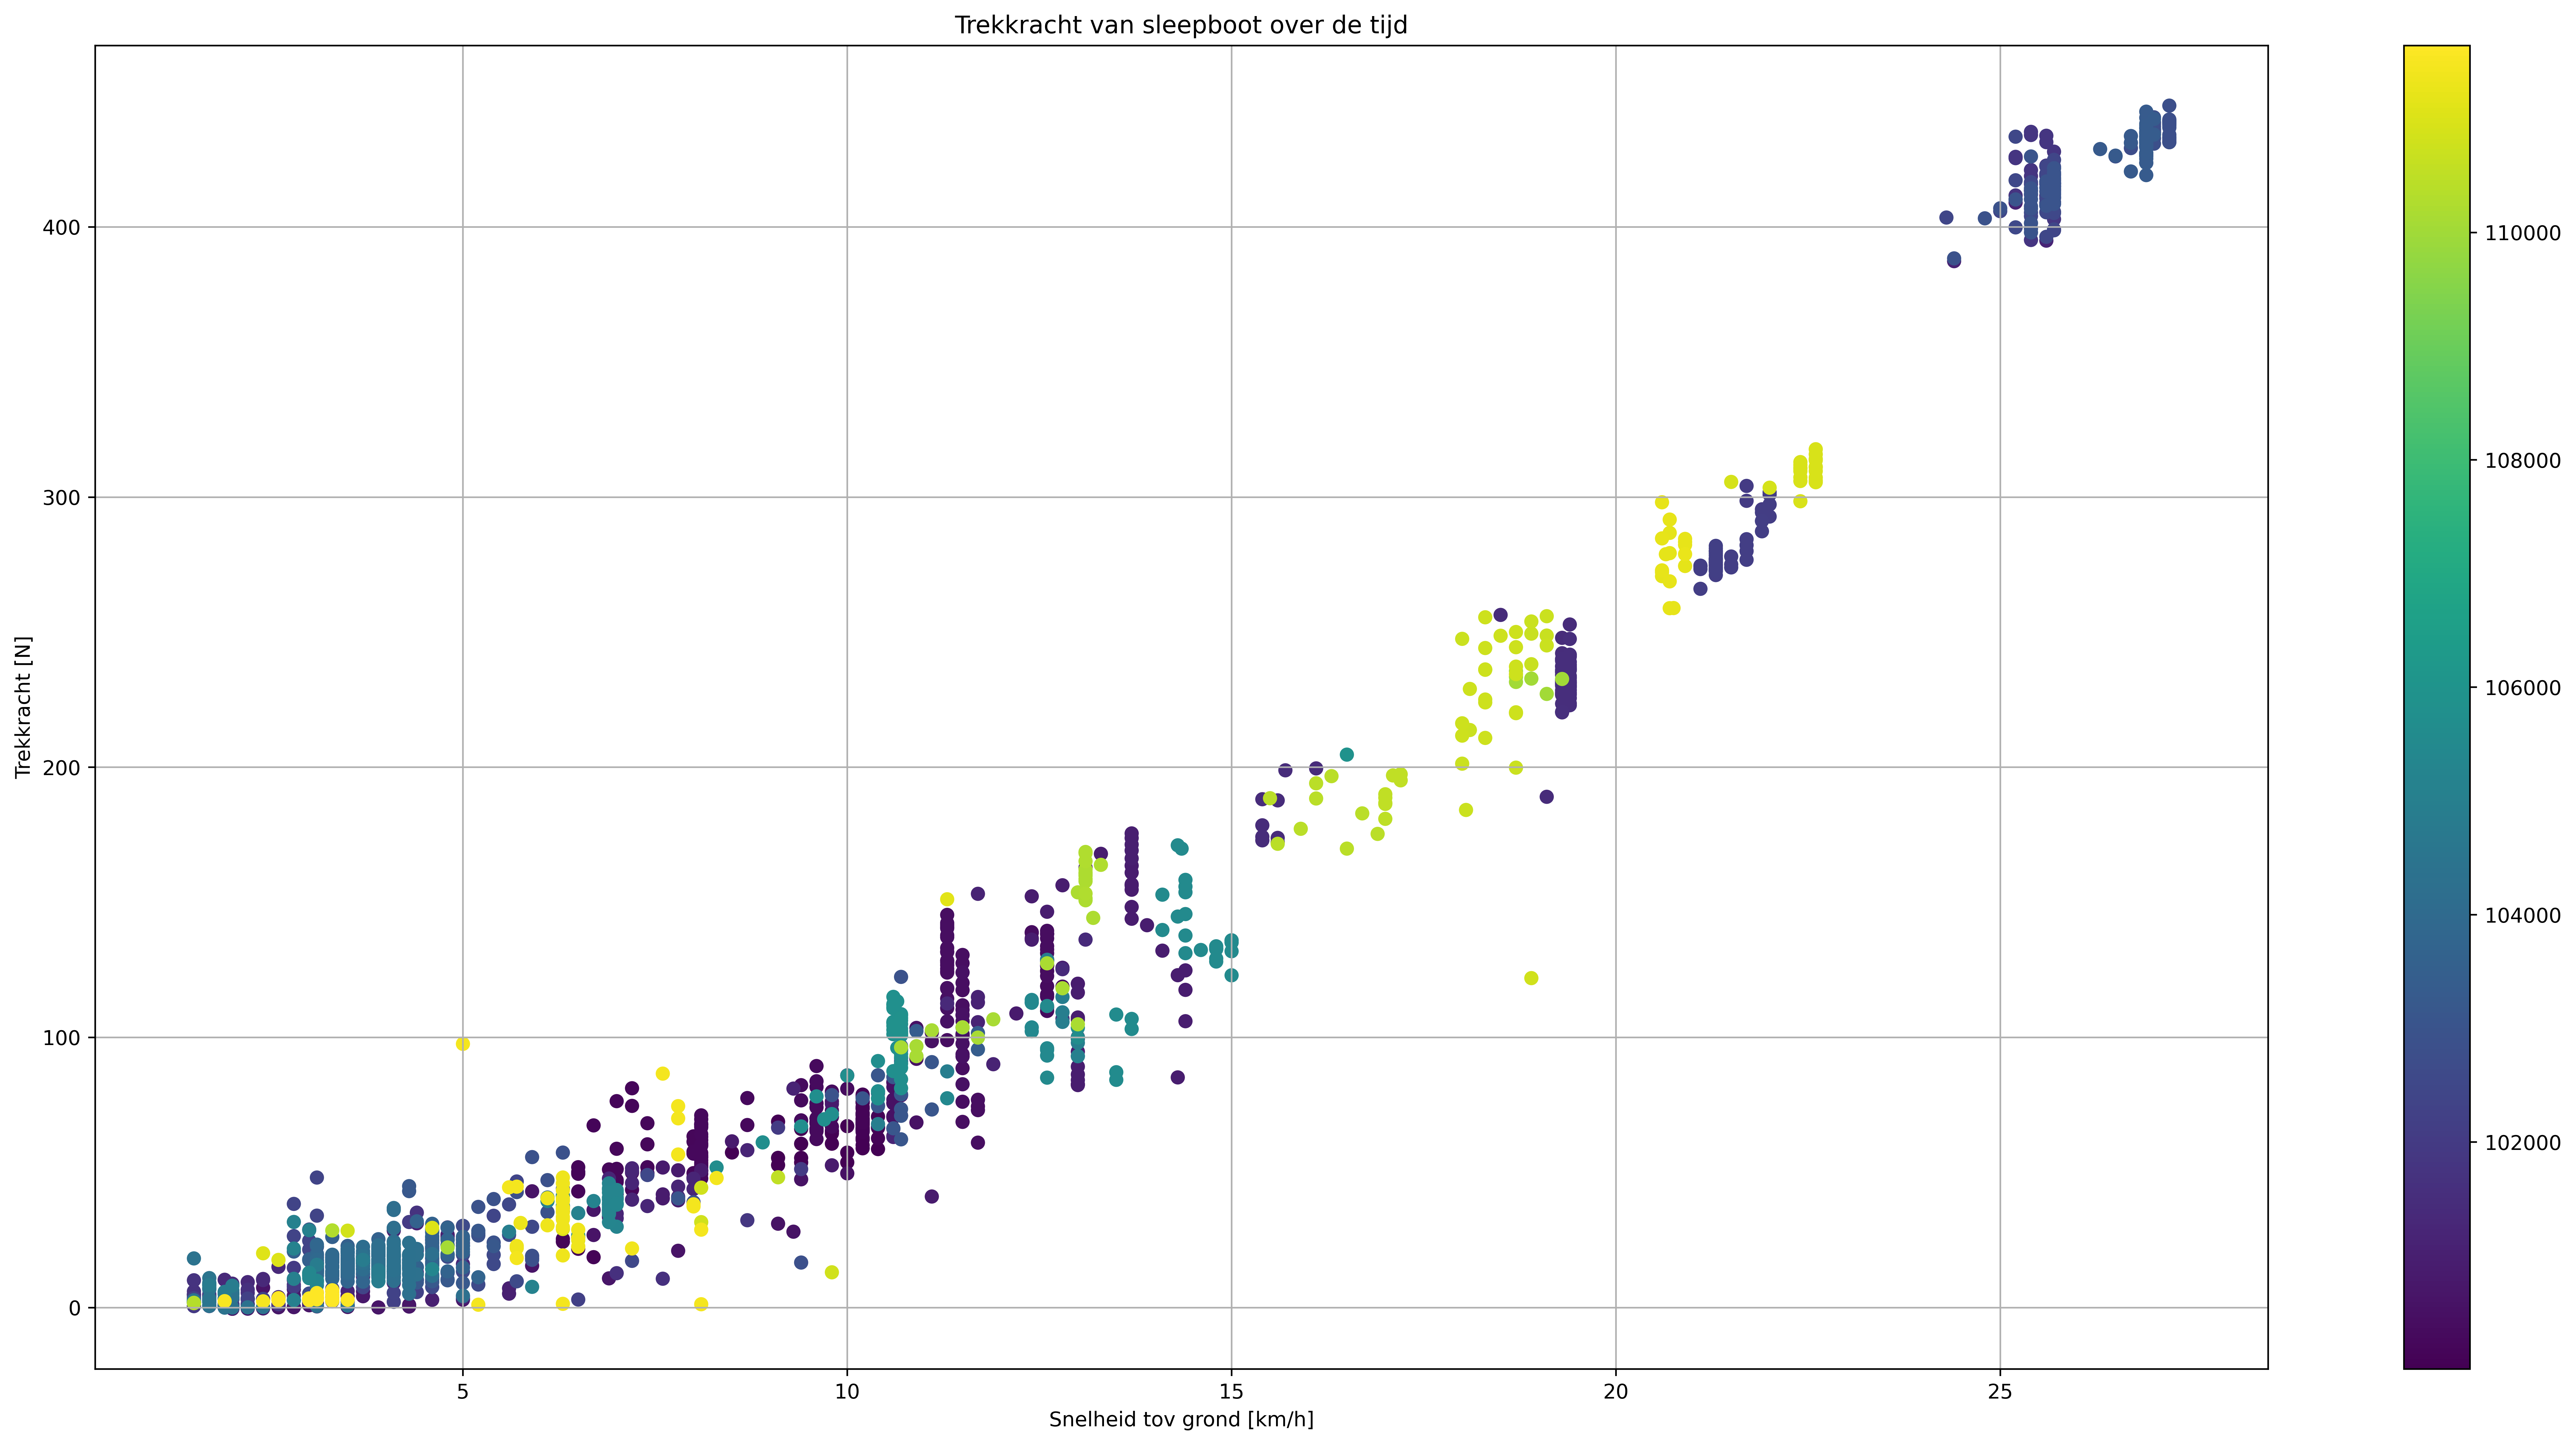

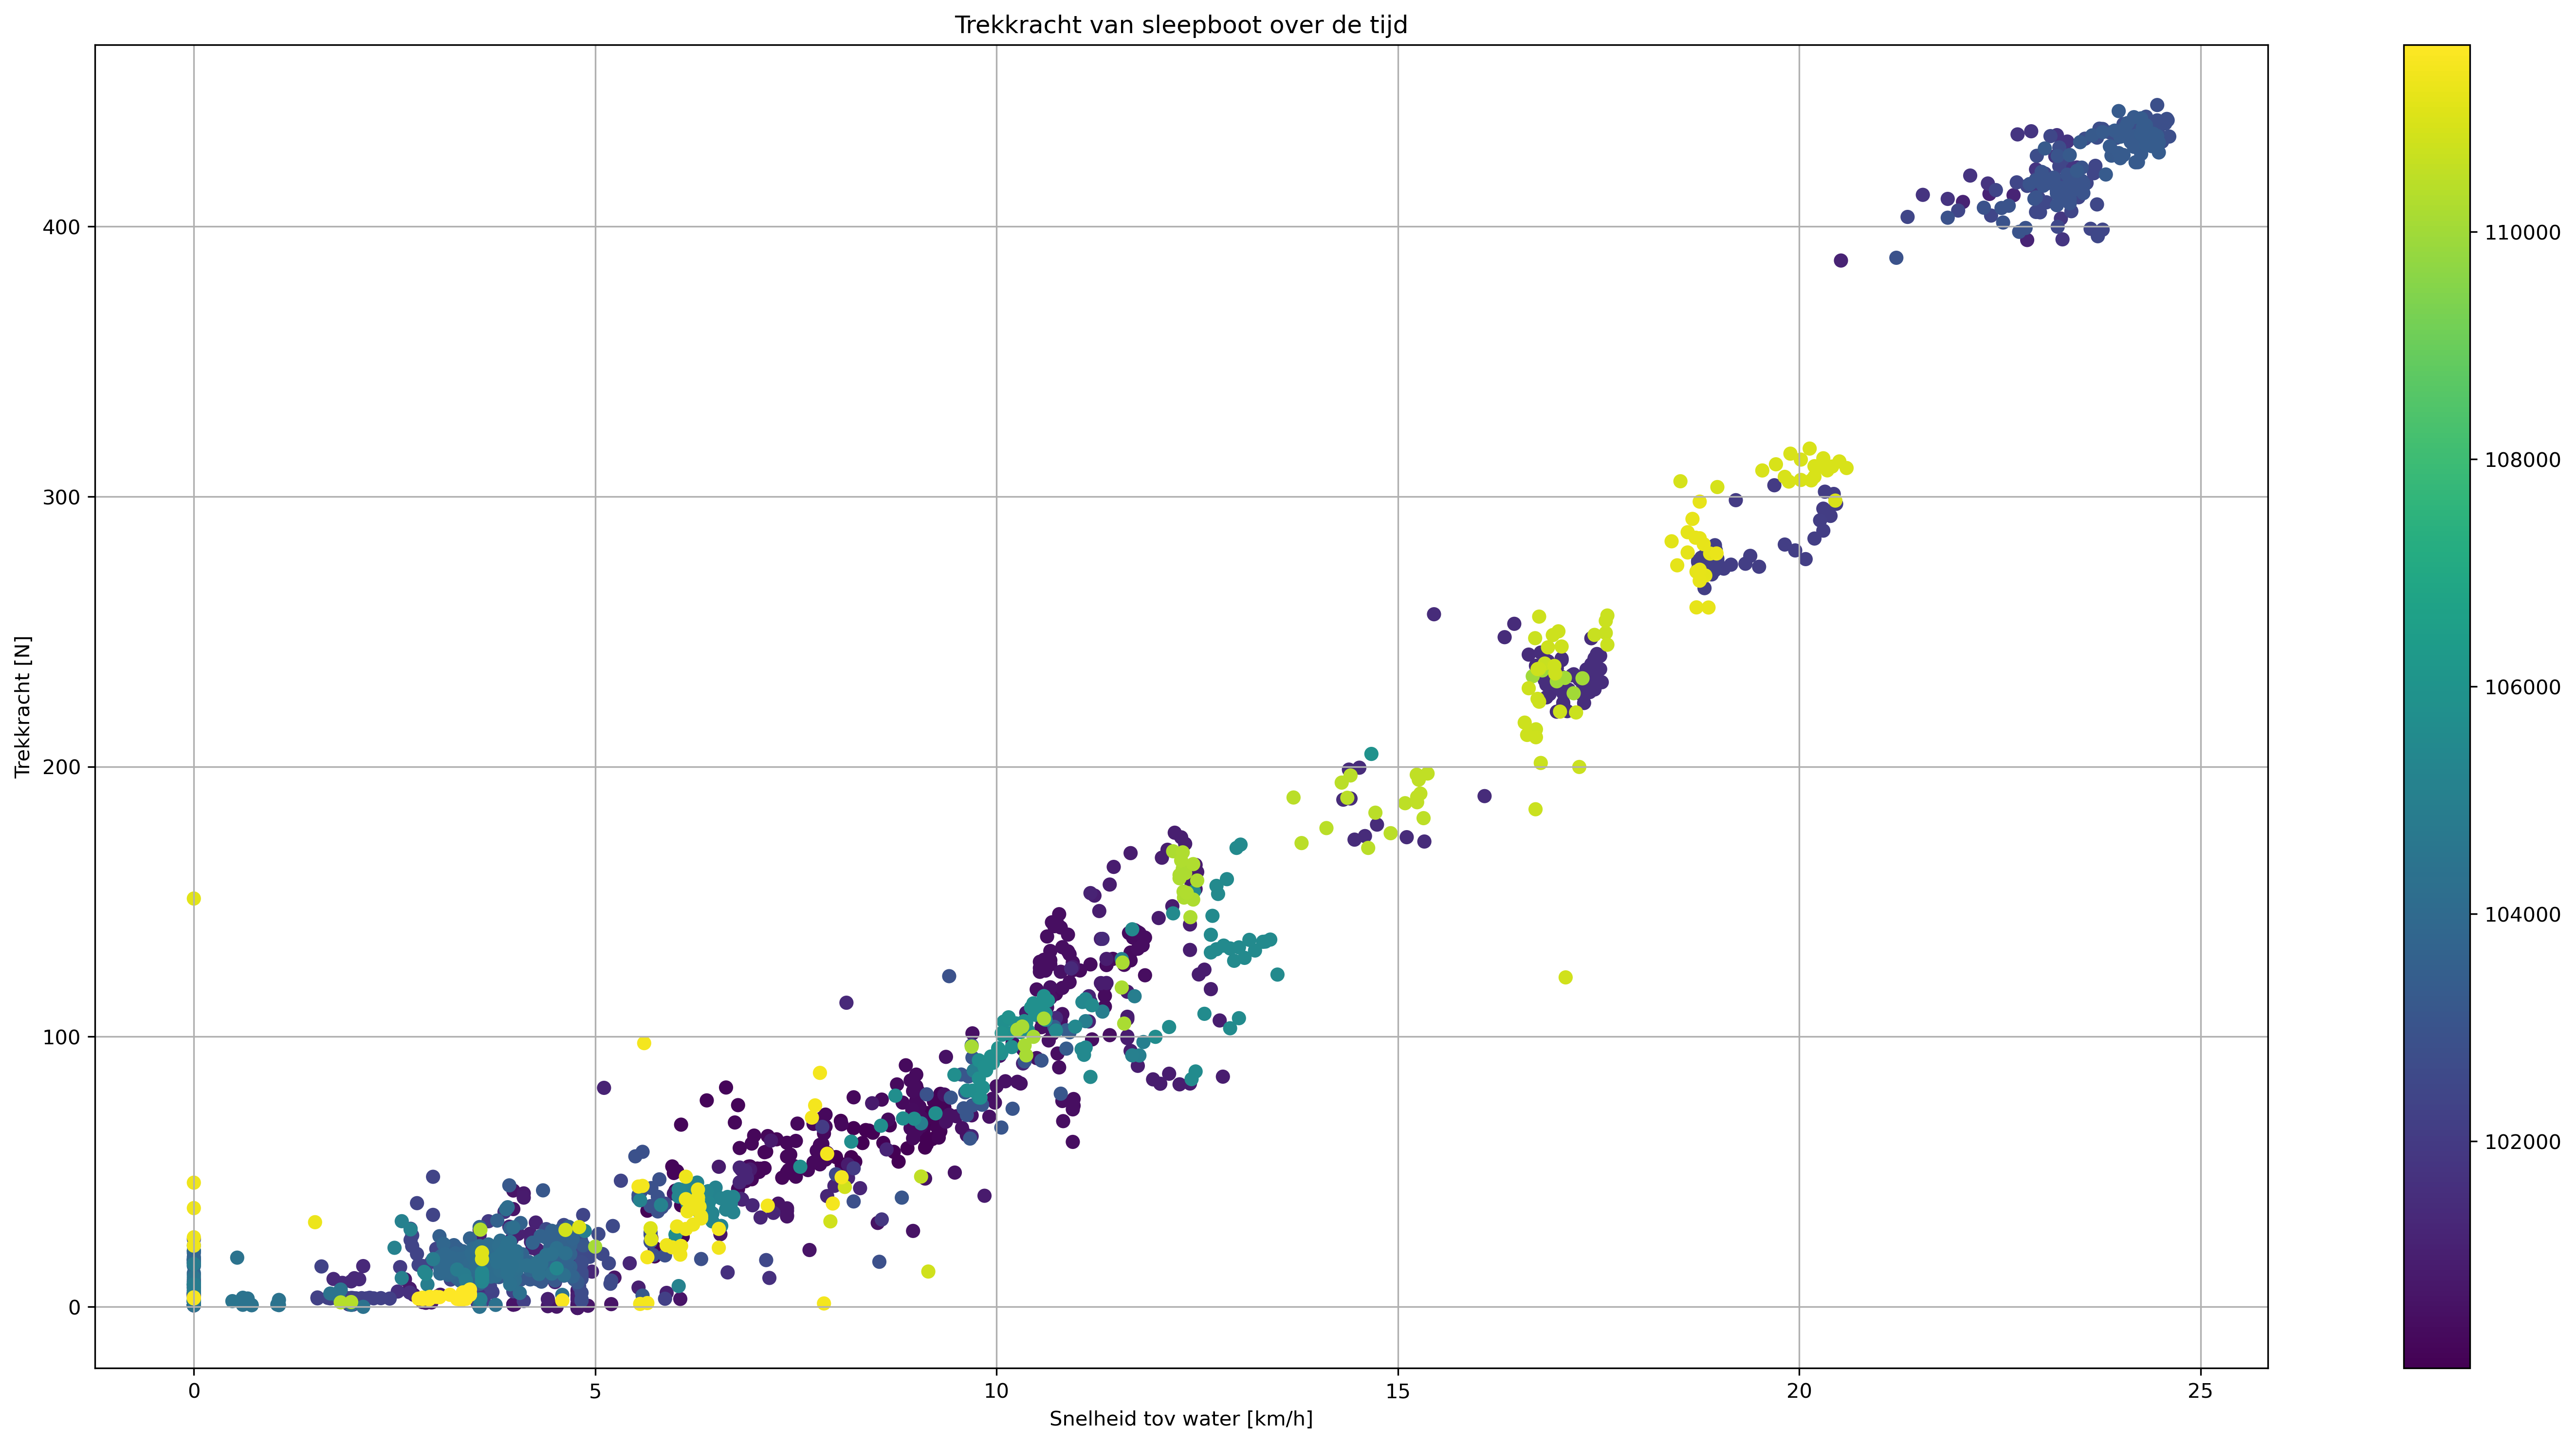

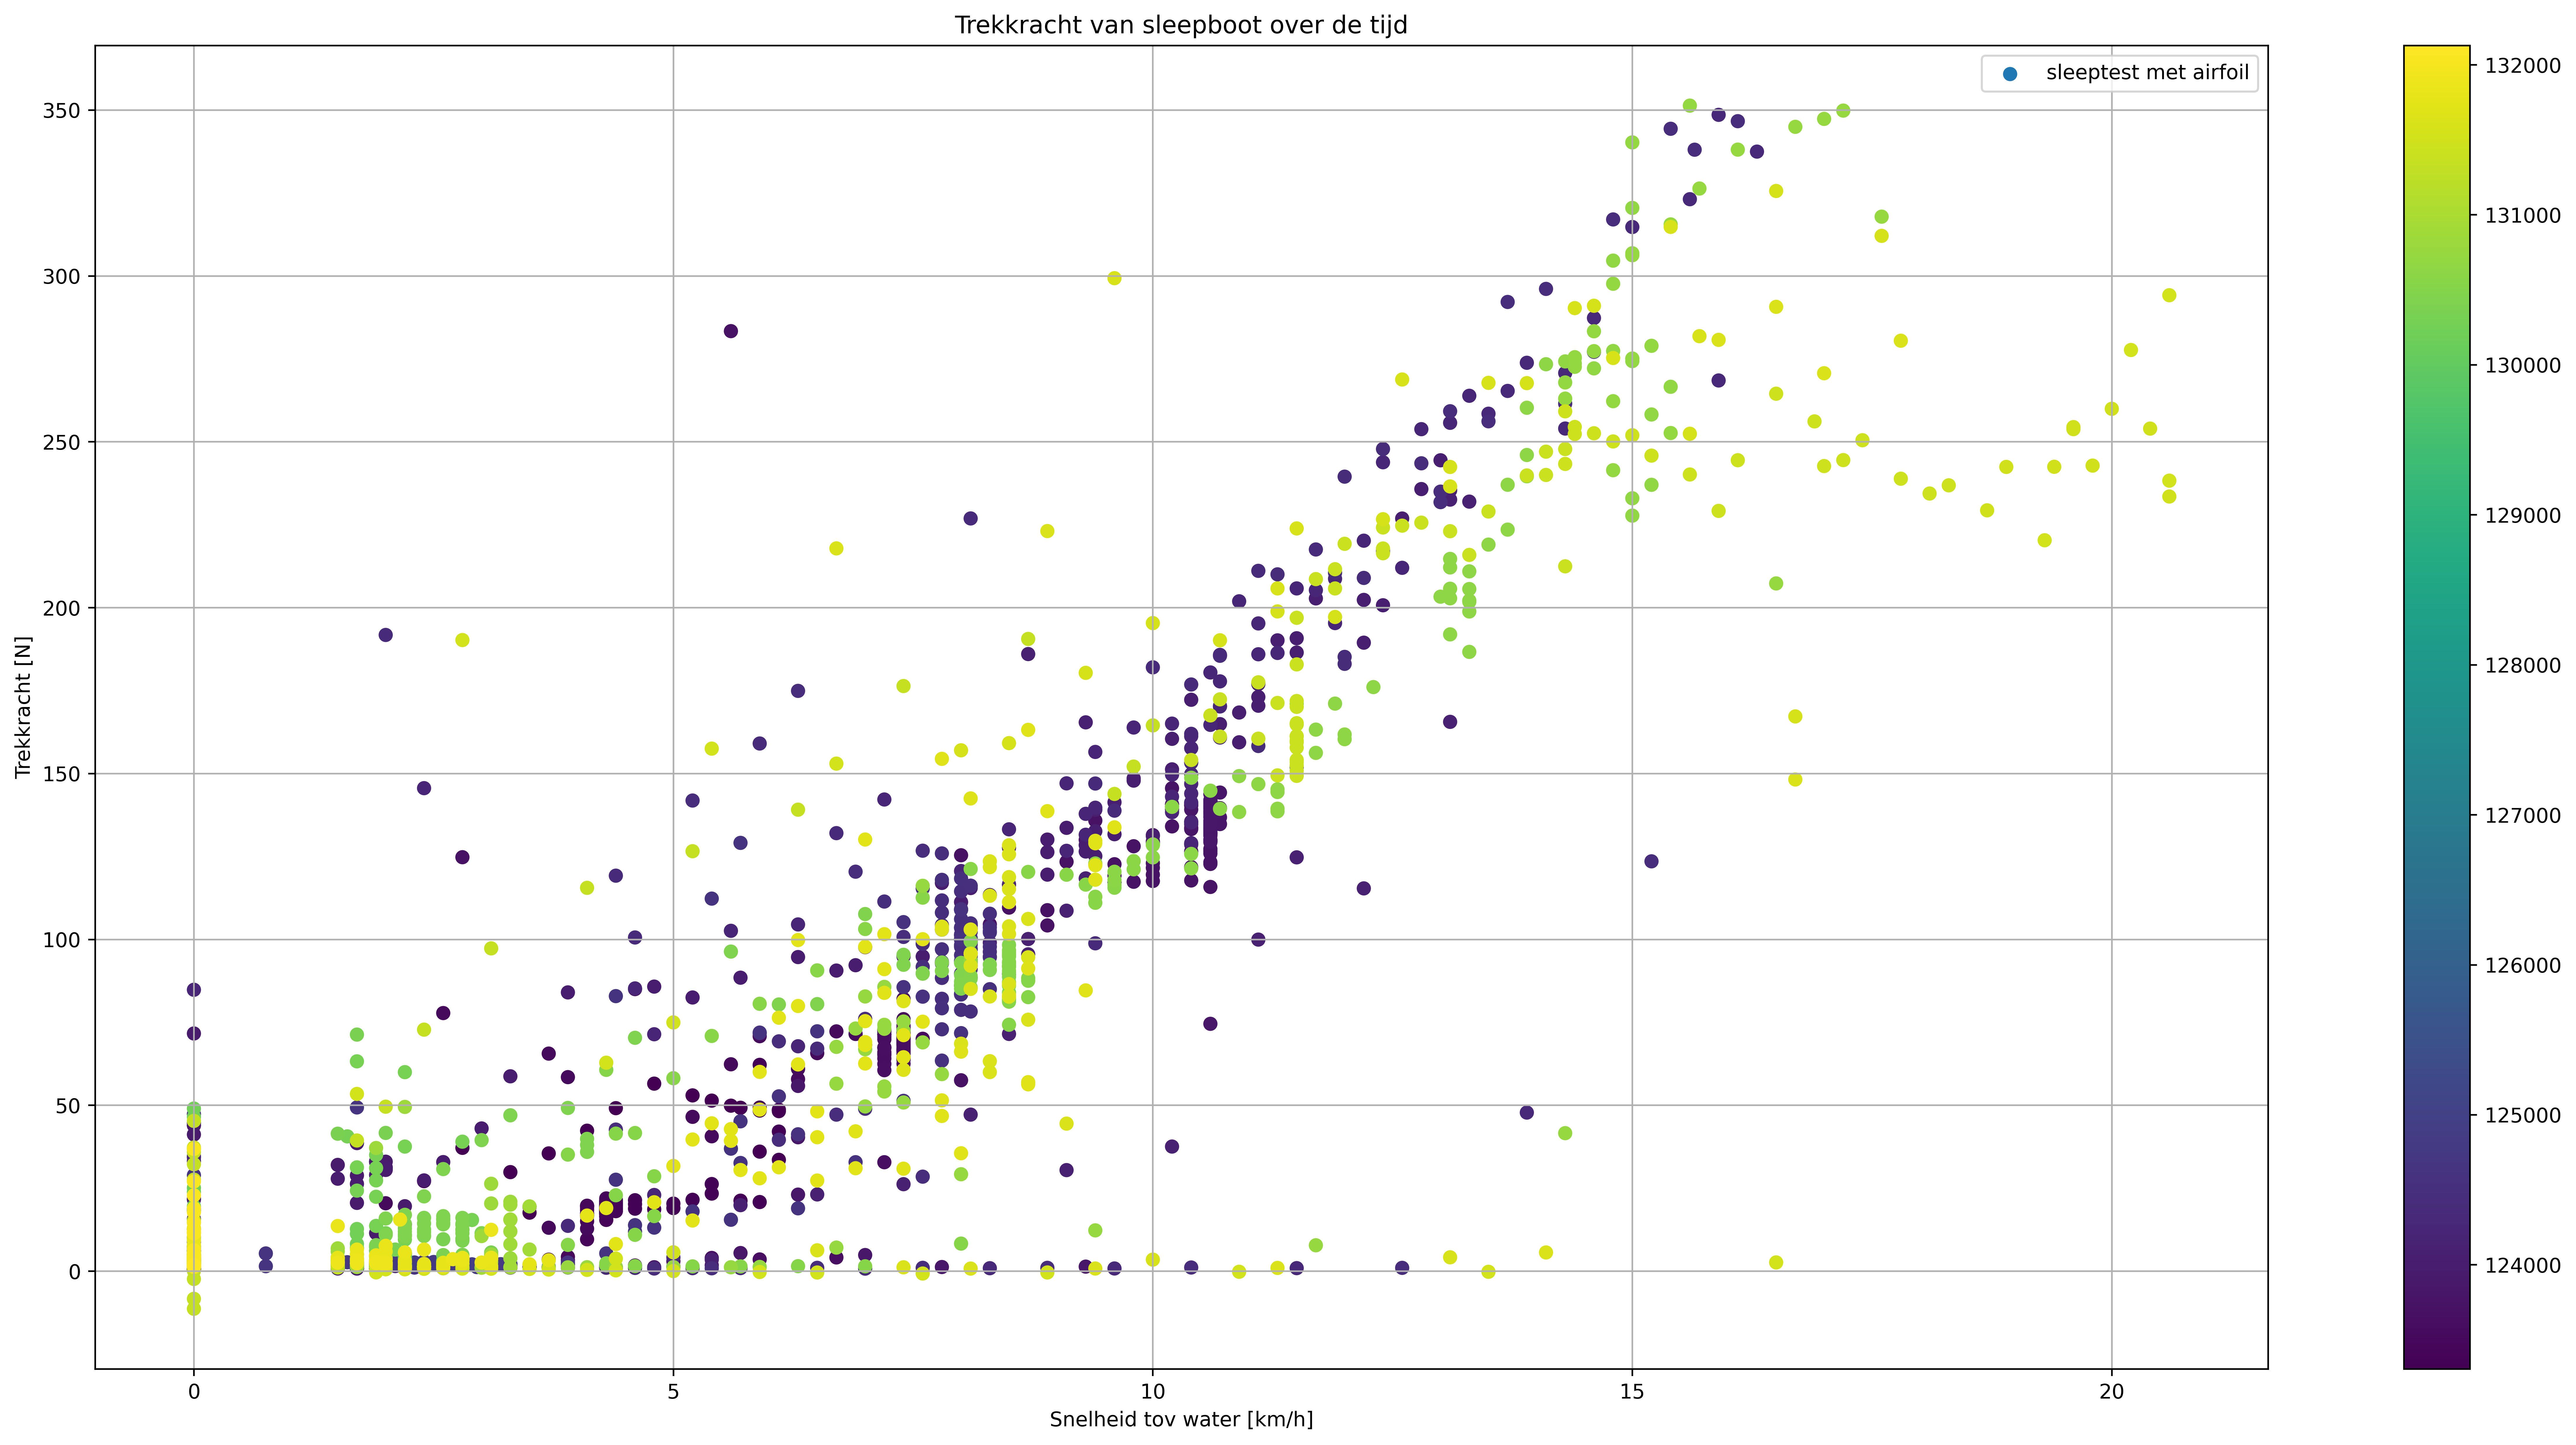

In [136]:
#plt.scatter(merged_df2['1_Tijd'].to_numpy(),merged_df2['2_Loadcell in kg'].to_numpy())
#plt.xlabel('Tijd [UU-MM-SS]')
#plt.ylabel('Gewicht [kg]')
#plt.title('Gewicht van de boot over de tijd')
#plt.grid(True)
#plt.show()
#
#
plt.figure(figsize=(24, 12),dpi=300)
plt.scatter(merged_df1['1_Dataloggertijd, in s'].to_numpy(),merged_df1['2_Loadcell in N'].to_numpy())
plt.xlabel('Tijd [Sec]')
plt.ylabel('Trekkracht [N]')
plt.title('Trekkracht van sleepboot over de tijd')
plt.grid(True)
plt.show()

plt.figure(figsize=(24, 12),dpi=500)
plt.scatter(merged_df1['1_Snelheid over de grond in km/h'].to_numpy(),merged_df1['2_Loadcell in N'].to_numpy(),c=merged_df1['1_Tijd'].to_numpy())
plt.colorbar()
plt.xlabel('Snelheid tov grond [km/h]')
plt.ylabel('Trekkracht [N]')
plt.title('Trekkracht van sleepboot over de tijd')
plt.grid(True)
plt.show()

plt.figure(figsize=(24, 12),dpi=300)
plt.scatter(merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy(),merged_df1['2_Loadcell in N'].to_numpy(),c=merged_df1['1_Tijd'].to_numpy())
plt.colorbar()
plt.xlabel('Snelheid tov water [km/h]')
plt.ylabel('Trekkracht [N]')
plt.title('Trekkracht van sleepboot over de tijd')
plt.grid(True)
plt.show()

plt.figure(figsize=(24, 12),dpi=500)
plt.scatter(merged_df4['1_Snelheid over de grond in km/h'].to_numpy(),merged_df4['2_Loadcell in N'].to_numpy(),label='sleeptest met airfoil',c=merged_df4['1_Tijd'].to_numpy())
#plt.scatter(merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy(),merged_df1['2_Loadcell in N'].to_numpy(),color = 'red',label='sleeptest zonder airfoil')
plt.colorbar()
plt.legend()
plt.xlabel('Snelheid tov grond [km/h]')
plt.ylabel('Trekkracht [N]')
plt.title('Trekkracht van sleepboot over de tijd')
plt.grid(True)
plt.show()

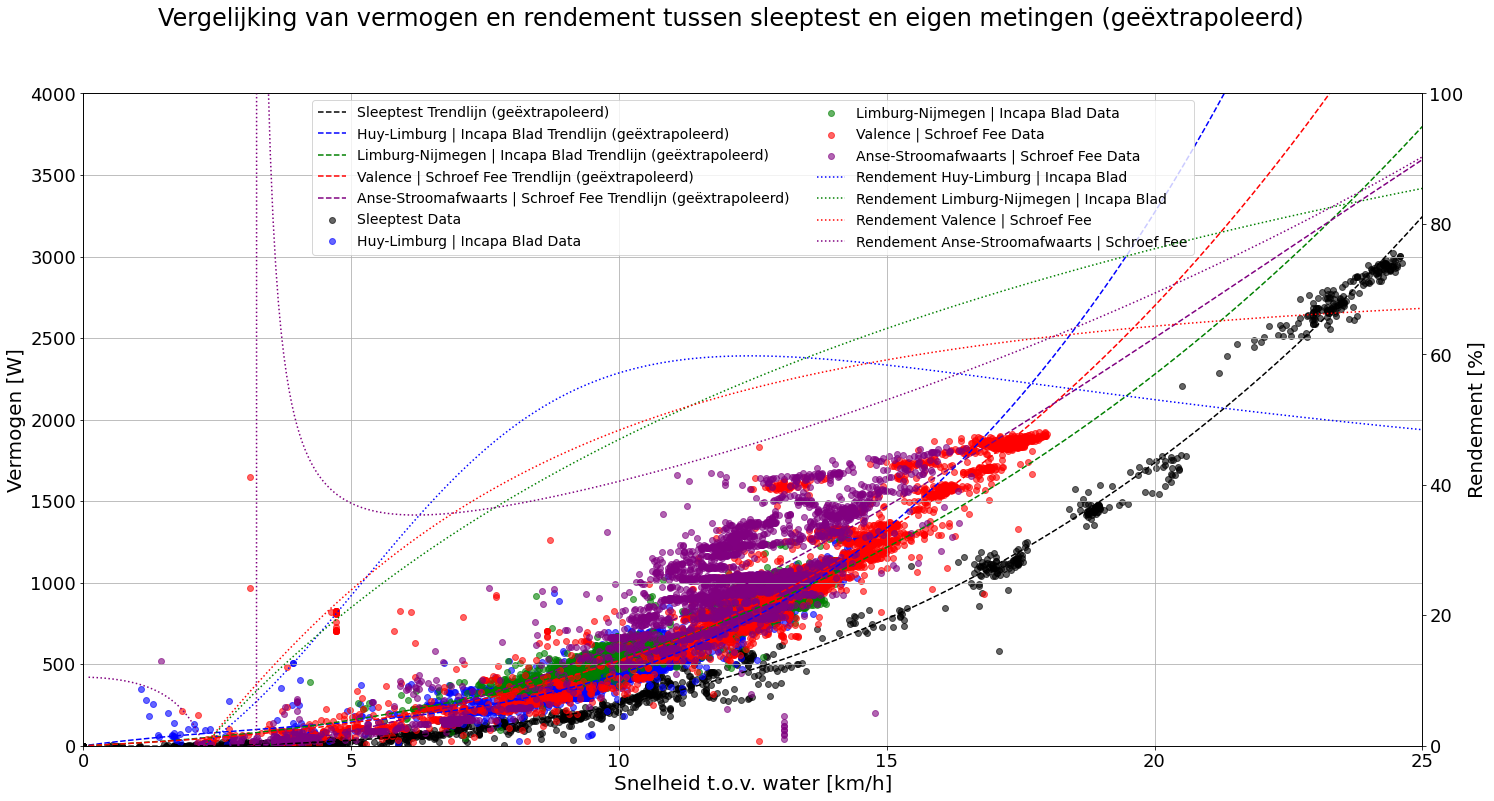

In [235]:
import numpy as np
import matplotlib.pyplot as plt

# Berekeningen voor de sleeptest (merged_df1)
# Snelheid behouden in km/h
merged_df1["speed_water_kmh"] = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
# Vermogen berekenen (kracht x snelheid in m/s)
merged_df1['Vermogen_sleeptest'] = merged_df1['2_Loadcell in N'].to_numpy() * merged_df1["speed_water_kmh"] * (1000/3600)

# Data voor de sleeptest (vermogen vs snelheid)
x_sleeptest = merged_df1['speed_water_kmh']
y_sleeptest = merged_df1['Vermogen_sleeptest']

# Sorteer de data voor een mooie trendlijn voor de sleeptest
sorted_indices_sleeptest = np.argsort(x_sleeptest)
x_sleeptest_sorted = x_sleeptest[sorted_indices_sleeptest]
y_sleeptest_sorted = y_sleeptest[sorted_indices_sleeptest]

# Pas een derdegraads polynoom aan die door (0,0) gaat voor de sleeptest
# Constructeer de design matrix zonder de constante term
X_sleeptest = np.vstack([x_sleeptest_sorted**3, x_sleeptest_sorted**2, x_sleeptest_sorted]).T
# Gebruik lstsq om de coëfficiënten te vinden
coeffs_sleeptest, _, _, _ = np.linalg.lstsq(X_sleeptest, y_sleeptest_sorted, rcond=None)
# Voeg de constante term (0) toe aan de coëfficiënten voor consistentie
coeffs_sleeptest = np.append(coeffs_sleeptest, 0)
# Bereken de trendlijn
trendline_sleeptest = np.polyval(coeffs_sleeptest, x_sleeptest_sorted)

# Extrapolatie van de trendlijnen voor snelheden tot bijvoorbeeld 25 km/h
max_speed = 25
x_extrapolated = np.linspace(0.1, max_speed, 500)  # Start bij 0.1 km/h om deling door nul te voorkomen

# Gebruik de coëfficiënten voor de derdegraads polynoom trendlijn voor extrapolatie van de sleeptest
trendline_sleeptest_extrapolated = np.polyval(coeffs_sleeptest, x_extrapolated)

# Lijst van eigen metingen (datasets)
eigen_datasets = [
    (merged_df3, 'blue', 'Huy-Limburg | Incapa Blad'),
    (merged_df5, 'green', 'Limburg-Nijmegen | Incapa Blad'),
    (merged_df6, 'red', 'Valence | Schroef Fee'),
    (merged_df7, 'purple', 'Anse-Stroomafwaarts | Schroef Fee')
]

# Maak de plot
fig, ax1 = plt.subplots(figsize=(24, 12))

# Plot de sleeptest data en trendlijn
ax1.scatter(x_sleeptest, y_sleeptest, color='black', label='Sleeptest Data', alpha=0.6)
ax1.plot(x_extrapolated, trendline_sleeptest_extrapolated, color='black', linestyle='--', label='Sleeptest Trendlijn (geëxtrapoleerd)')

# Lijst om rendementscurves op te slaan
rendement_curves = []

# Loop over de eigen metingen
for df, color, label in eigen_datasets:
    x = df['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
    y = df['2_VESC input vermogen (W)'].to_numpy()
    
    # Sorteer de data
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]
    
    # Pas een derdegraads polynoom aan die door (0,0) gaat
    X = np.vstack([x_sorted**3, x_sorted**2, x_sorted]).T
    coeffs, _, _, _ = np.linalg.lstsq(X, y_sorted, rcond=None)
    coeffs = np.append(coeffs, 0)  # Voeg de constante term (0) toe
    
    # Extrapoleer de trendlijn
    trendline_extrapolated = np.polyval(coeffs, x_extrapolated)
    
    # Bereken het rendement
    # Voeg een kleine waarde toe aan de noemer om deling door nul te voorkomen
    trendline_extrapolated_adjusted = trendline_extrapolated + 1e-6
    rendement = (trendline_sleeptest_extrapolated / trendline_extrapolated_adjusted) * 100
    rendement_curves.append((rendement, color, label))
    
    # Plot de eigen meting data en trendlijn
    ax1.scatter(x, y, color=color, marker='o', label=f'{label} Data', alpha=0.6)
    ax1.plot(x_extrapolated, trendline_extrapolated, color=color, linestyle='--', label=f'{label} Trendlijn (geëxtrapoleerd)')
    
# Stel de assen en labels in voor ax1
ax1.set_xlabel('Snelheid t.o.v. water [km/h]', fontsize=20)
ax1.set_ylabel('Vermogen [W]', color='black', fontsize=20)
ax1.set_ylim(0, 4000)
ax1.set_xlim(0, max_speed)
ax1.tick_params(axis='y', labelcolor='black', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.grid(True)

# Tweede y-as voor rendement
ax2 = ax1.twinx()
ax2.set_ylabel('Rendement [%]', color='black', fontsize=20)

# Plot het rendement voor elke eigen meting
for rendement, color, label in rendement_curves:
    ax2.plot(x_extrapolated, rendement, color=color, linestyle=':', label=f'Rendement {label}')

ax2.tick_params(axis='y', labelcolor='black', labelsize=18)
ax2.set_ylim(0, 100)  # Stel de y-as limieten in voor rendement tussen 0% en 100%

# Voeg alle legendas samen
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper center', fontsize=14, ncol=2)

# Titel en achtergrond
fig.suptitle('Vergelijking van vermogen en rendement tussen sleeptest en eigen metingen (geëxtrapoleerd)', fontsize=24)
fig.patch.set_facecolor('white')
plt.show()


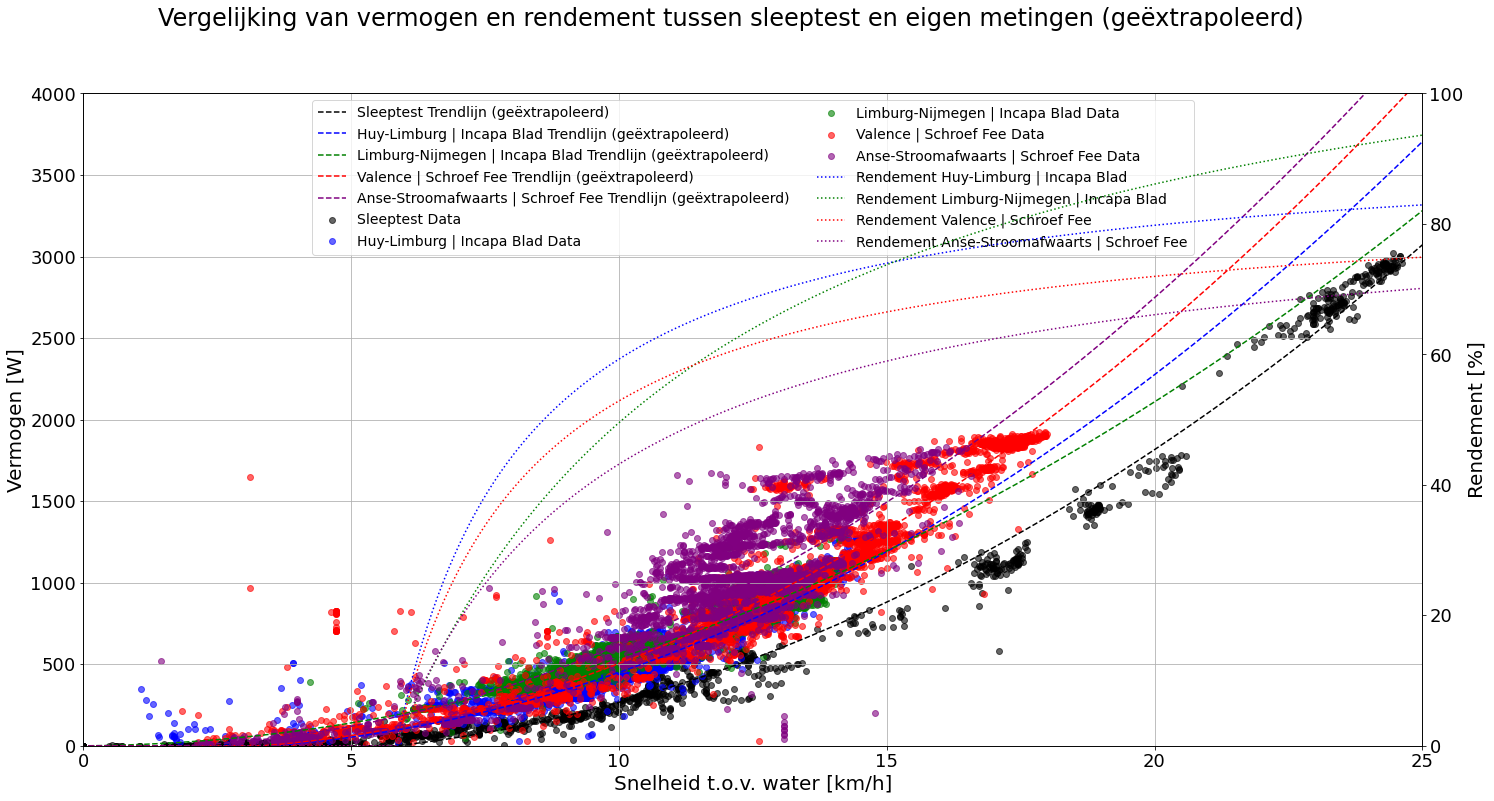

In [236]:
import numpy as np
import matplotlib.pyplot as plt

# Berekeningen voor de sleeptest (merged_df1)
# Snelheid behouden in km/h
merged_df1["speed_water_kmh"] = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
# Vermogen berekenen (kracht x snelheid in m/s)
merged_df1['Vermogen_sleeptest'] = merged_df1['2_Loadcell in N'].to_numpy() * merged_df1["speed_water_kmh"] * (1000/3600)

# Data voor de sleeptest (vermogen vs snelheid)
x_sleeptest = merged_df1['speed_water_kmh'].to_numpy()
y_sleeptest = merged_df1['Vermogen_sleeptest'].to_numpy()

# Sorteer de data voor een mooie trendlijn voor de sleeptest
sorted_indices_sleeptest = np.argsort(x_sleeptest)
x_sleeptest_sorted = x_sleeptest[sorted_indices_sleeptest]
y_sleeptest_sorted = y_sleeptest[sorted_indices_sleeptest]

# Pas een tweedegraads polynoom aan die door (0,0) gaat voor de sleeptest
# Constructeer de design matrix zonder de constante term
X_sleeptest = np.vstack([x_sleeptest_sorted**2, x_sleeptest_sorted]).T
# Gebruik lstsq om de coëfficiënten te vinden
coeffs_sleeptest, _, _, _ = np.linalg.lstsq(X_sleeptest, y_sleeptest_sorted, rcond=None)
# Voeg de constante term (0) toe aan de coëfficiënten voor consistentie
coeffs_sleeptest = np.append(coeffs_sleeptest, 0)
# Bereken de trendlijn
trendline_sleeptest = np.polyval(coeffs_sleeptest, x_sleeptest_sorted)
# Zorg dat de trendlijn niet onder 0 komt
trendline_sleeptest = np.maximum(trendline_sleeptest, 0)

# Extrapolatie van de trendlijnen voor snelheden tot bijvoorbeeld 25 km/h
max_speed = 25
x_extrapolated = np.linspace(0.1, max_speed, 500)  # Start bij 0.1 km/h om deling door nul te voorkomen

# Gebruik de coëfficiënten voor de tweedegraads polynoom trendlijn voor extrapolatie van de sleeptest
trendline_sleeptest_extrapolated = np.polyval(coeffs_sleeptest, x_extrapolated)
trendline_sleeptest_extrapolated = np.maximum(trendline_sleeptest_extrapolated, 0)

# Lijst van eigen metingen (datasets)
eigen_datasets = [
    (merged_df3, 'blue', 'Huy-Limburg | Incapa Blad'),
    (merged_df5, 'green', 'Limburg-Nijmegen | Incapa Blad'),
    (merged_df6, 'red', 'Valence | Schroef Fee'),
    (merged_df7, 'purple', 'Anse-Stroomafwaarts | Schroef Fee')
]

# Maak de plot
fig, ax1 = plt.subplots(figsize=(24, 12))

# Plot de sleeptest data en trendlijn
ax1.scatter(x_sleeptest, y_sleeptest, color='black', label='Sleeptest Data', alpha=0.6)
ax1.plot(x_extrapolated, trendline_sleeptest_extrapolated, color='black', linestyle='--', label='Sleeptest Trendlijn (geëxtrapoleerd)')

# Lijst om rendementscurves op te slaan
rendement_curves = []

# Loop over de eigen metingen
for df, color, label in eigen_datasets:
    x = df['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
    y = df['2_VESC input vermogen (W)'].to_numpy()
    
    # Sorteer de data
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]
    
    # Pas een tweedegraads polynoom aan die door (0,0) gaat
    X = np.vstack([x_sorted**2, x_sorted]).T
    coeffs, _, _, _ = np.linalg.lstsq(X, y_sorted, rcond=None)
    coeffs = np.append(coeffs, 0)  # Voeg de constante term (0) toe
    
    # Extrapoleer de trendlijn
    trendline_extrapolated = np.polyval(coeffs, x_extrapolated)
    trendline_extrapolated = np.maximum(trendline_extrapolated, 0)  # Zorg dat de trendlijn niet onder 0 komt
    
    # Bereken het rendement
    trendline_extrapolated_adjusted = trendline_extrapolated + 1e-6  # Voeg een kleine waarde toe om deling door nul te voorkomen
    rendement = (trendline_sleeptest_extrapolated / trendline_extrapolated_adjusted) * 100
    rendement_curves.append((rendement, color, label))
    
    # Plot de eigen meting data en trendlijn
    ax1.scatter(x, y, color=color, marker='o', label=f'{label} Data', alpha=0.6)
    ax1.plot(x_extrapolated, trendline_extrapolated, color=color, linestyle='--', label=f'{label} Trendlijn (geëxtrapoleerd)')
    
# Stel de assen en labels in voor ax1
ax1.set_xlabel('Snelheid t.o.v. water [km/h]', fontsize=20)
ax1.set_ylabel('Vermogen [W]', color='black', fontsize=20)
ax1.set_ylim(0, 4000)
ax1.set_xlim(0, max_speed)
ax1.tick_params(axis='y', labelcolor='black', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.grid(True)

# Tweede y-as voor rendement
ax2 = ax1.twinx()
ax2.set_ylabel('Rendement [%]', color='black', fontsize=20)

# Plot het rendement voor elke eigen meting
for rendement, color, label in rendement_curves:
    ax2.plot(x_extrapolated, rendement, color=color, linestyle=':', label=f'Rendement {label}')

ax2.tick_params(axis='y', labelcolor='black', labelsize=18)
ax2.set_ylim(0, 100)  # Stel de y-as limieten in voor rendement tussen 0% en 100%

# Voeg alle legendas samen
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper center', fontsize=14, ncol=2)

# Titel en achtergrond
fig.suptitle('Vergelijking van vermogen en rendement tussen sleeptest en eigen metingen (geëxtrapoleerd)', fontsize=24)
fig.patch.set_facecolor('white')
plt.show()


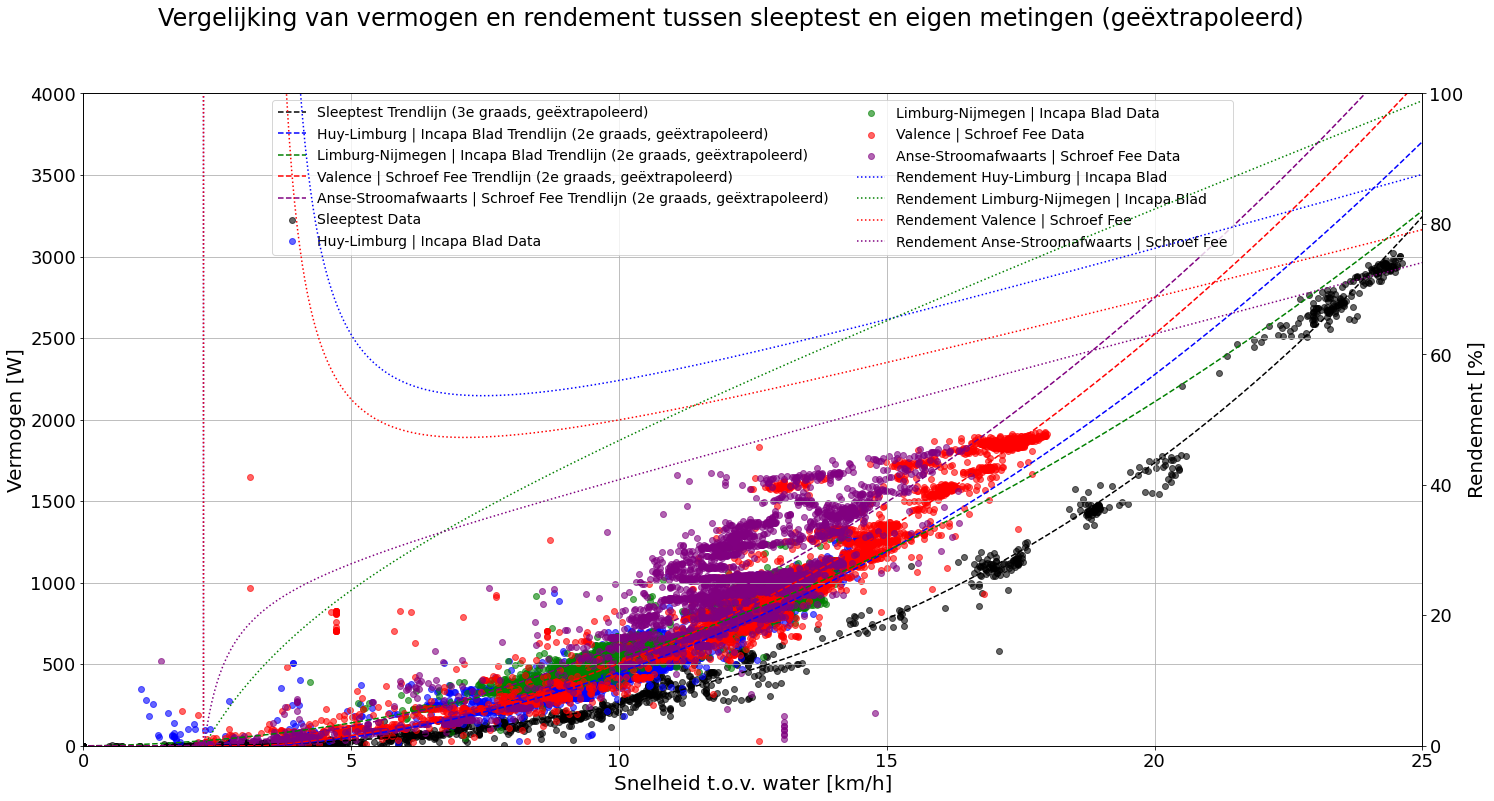

In [237]:
import numpy as np
import matplotlib.pyplot as plt

# Berekeningen voor de sleeptest (merged_df1)
# Snelheid behouden in km/h
merged_df1["speed_water_kmh"] = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
# Vermogen berekenen (kracht x snelheid in m/s)
merged_df1['Vermogen_sleeptest'] = merged_df1['2_Loadcell in N'].to_numpy() * merged_df1["speed_water_kmh"] * (1000/3600)

# Data voor de sleeptest (vermogen vs snelheid)
x_sleeptest = merged_df1['speed_water_kmh'].to_numpy()
y_sleeptest = merged_df1['Vermogen_sleeptest'].to_numpy()

# Sorteer de data voor een mooie trendlijn voor de sleeptest
sorted_indices_sleeptest = np.argsort(x_sleeptest)
x_sleeptest_sorted = x_sleeptest[sorted_indices_sleeptest]
y_sleeptest_sorted = y_sleeptest[sorted_indices_sleeptest]

# Pas een derdegraads polynoom aan die door (0,0) gaat voor de sleeptest
# Constructeer de design matrix zonder de constante term
X_sleeptest = np.vstack([x_sleeptest_sorted**3, x_sleeptest_sorted**2, x_sleeptest_sorted]).T
# Gebruik lstsq om de coëfficiënten te vinden
coeffs_sleeptest, _, _, _ = np.linalg.lstsq(X_sleeptest, y_sleeptest_sorted, rcond=None)
# Voeg de constante term (0) toe aan de coëfficiënten voor consistentie
coeffs_sleeptest = np.append(coeffs_sleeptest, 0)
# Bereken de trendlijn
trendline_sleeptest = np.polyval(coeffs_sleeptest, x_sleeptest_sorted)
# Zorg dat de trendlijn niet onder 0 komt
trendline_sleeptest = np.maximum(trendline_sleeptest, 0)

# Extrapolatie van de trendlijnen voor snelheden tot bijvoorbeeld 25 km/h
max_speed = 25
x_extrapolated = np.linspace(0.1, max_speed, 500)  # Start bij 0.1 km/h om deling door nul te voorkomen

# Gebruik de coëfficiënten voor de derdegraads polynoom trendlijn voor extrapolatie van de sleeptest
trendline_sleeptest_extrapolated = np.polyval(coeffs_sleeptest, x_extrapolated)
trendline_sleeptest_extrapolated = np.maximum(trendline_sleeptest_extrapolated, 0)

# Lijst van eigen metingen (datasets)
eigen_datasets = [
    (merged_df3, 'blue', 'Huy-Limburg | Incapa Blad'),
    (merged_df5, 'green', 'Limburg-Nijmegen | Incapa Blad'),
    (merged_df6, 'red', 'Valence | Schroef Fee'),
    (merged_df7, 'purple', 'Anse-Stroomafwaarts | Schroef Fee')
]

# Maak de plot
fig, ax1 = plt.subplots(figsize=(24, 12))

# Plot de sleeptest data en trendlijn
ax1.scatter(x_sleeptest, y_sleeptest, color='black', label='Sleeptest Data', alpha=0.6)
ax1.plot(x_extrapolated, trendline_sleeptest_extrapolated, color='black', linestyle='--', label='Sleeptest Trendlijn (3e graads, geëxtrapoleerd)')

# Lijst om rendementscurves op te slaan
rendement_curves = []

# Loop over de eigen metingen
for df, color, label in eigen_datasets:
    x = df['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
    y = df['2_VESC input vermogen (W)'].to_numpy()
    
    # Sorteer de data
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]
    
    # Pas een tweedegraads polynoom aan die door (0,0) gaat
    X = np.vstack([x_sorted**2, x_sorted]).T
    coeffs, _, _, _ = np.linalg.lstsq(X, y_sorted, rcond=None)
    coeffs = np.append(coeffs, 0)  # Voeg de constante term (0) toe
    
    # Extrapoleer de trendlijn
    trendline_extrapolated = np.polyval(coeffs, x_extrapolated)
    trendline_extrapolated = np.maximum(trendline_extrapolated, 0)  # Zorg dat de trendlijn niet onder 0 komt
    
    # Bereken het rendement
    trendline_extrapolated_adjusted = trendline_extrapolated + 1e-6  # Voeg een kleine waarde toe om deling door nul te voorkomen
    rendement = (trendline_sleeptest_extrapolated / trendline_extrapolated_adjusted) * 100
    rendement_curves.append((rendement, color, label))
    
    # Plot de eigen meting data en trendlijn
    ax1.scatter(x, y, color=color, marker='o', label=f'{label} Data', alpha=0.6)
    ax1.plot(x_extrapolated, trendline_extrapolated, color=color, linestyle='--', label=f'{label} Trendlijn (2e graads, geëxtrapoleerd)')
    
# Stel de assen en labels in voor ax1
ax1.set_xlabel('Snelheid t.o.v. water [km/h]', fontsize=20)
ax1.set_ylabel('Vermogen [W]', color='black', fontsize=20)
ax1.set_ylim(0, 4000)
ax1.set_xlim(0, max_speed)
ax1.tick_params(axis='y', labelcolor='black', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.grid(True)

# Tweede y-as voor rendement
ax2 = ax1.twinx()
ax2.set_ylabel('Rendement [%]', color='black', fontsize=20)

# Plot het rendement voor elke eigen meting
for rendement, color, label in rendement_curves:
    ax2.plot(x_extrapolated, rendement, color=color, linestyle=':', label=f'Rendement {label}')
    
ax2.tick_params(axis='y', labelcolor='black', labelsize=18)
ax2.set_ylim(0, 100)  # Stel de y-as limieten in voor rendement tussen 0% en 100%

# Voeg alle legendas samen
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper center', fontsize=14, ncol=2)

# Titel en achtergrond
fig.suptitle('Vergelijking van vermogen en rendement tussen sleeptest en eigen metingen (geëxtrapoleerd)', fontsize=24)
fig.patch.set_facecolor('white')
plt.show()


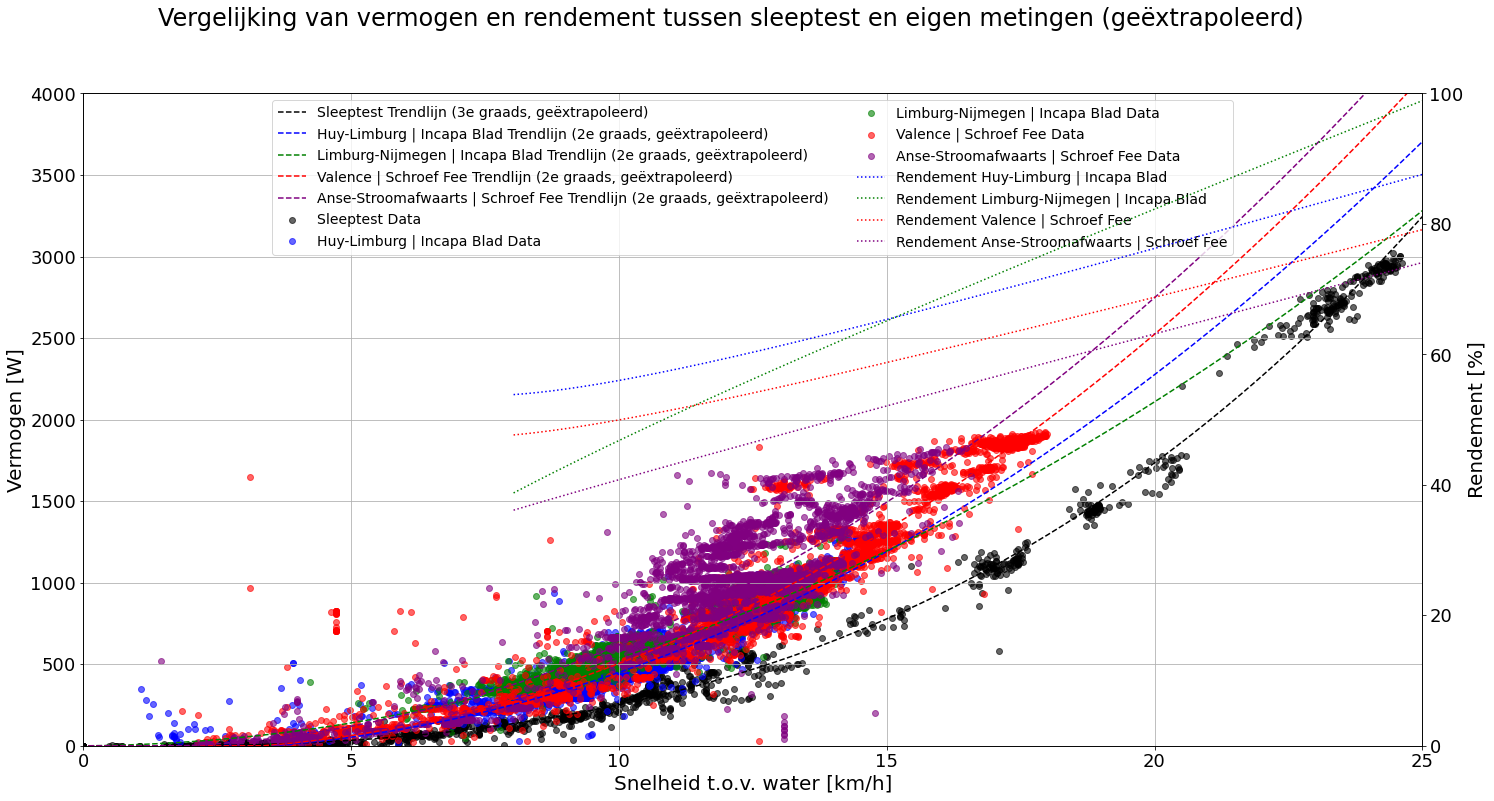

In [239]:
import numpy as np
import matplotlib.pyplot as plt

# Berekeningen voor de sleeptest (merged_df1)
# Snelheid behouden in km/h
merged_df1["speed_water_kmh"] = merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
# Vermogen berekenen (kracht x snelheid in m/s)
merged_df1['Vermogen_sleeptest'] = merged_df1['2_Loadcell in N'].to_numpy() * merged_df1["speed_water_kmh"] * (1000/3600)

# Data voor de sleeptest (vermogen vs snelheid)
x_sleeptest = merged_df1['speed_water_kmh'].to_numpy()
y_sleeptest = merged_df1['Vermogen_sleeptest'].to_numpy()

# Sorteer de data voor een mooie trendlijn voor de sleeptest
sorted_indices_sleeptest = np.argsort(x_sleeptest)
x_sleeptest_sorted = x_sleeptest[sorted_indices_sleeptest]
y_sleeptest_sorted = y_sleeptest[sorted_indices_sleeptest]

# Pas een derdegraads polynoom aan die door (0,0) gaat voor de sleeptest
X_sleeptest = np.vstack([x_sleeptest_sorted**3, x_sleeptest_sorted**2, x_sleeptest_sorted]).T
coeffs_sleeptest, _, _, _ = np.linalg.lstsq(X_sleeptest, y_sleeptest_sorted, rcond=None)
coeffs_sleeptest = np.append(coeffs_sleeptest, 0)
trendline_sleeptest = np.polyval(coeffs_sleeptest, x_sleeptest_sorted)
trendline_sleeptest = np.maximum(trendline_sleeptest, 0)

# Extrapolatie van de trendlijnen voor snelheden tot bijvoorbeeld 25 km/h
max_speed = 25
x_extrapolated = np.linspace(0.1, max_speed, 500)  # Start bij 0.1 km/h om deling door nul te voorkomen

trendline_sleeptest_extrapolated = np.polyval(coeffs_sleeptest, x_extrapolated)
trendline_sleeptest_extrapolated = np.maximum(trendline_sleeptest_extrapolated, 0)

# Lijst van eigen metingen (datasets)
eigen_datasets = [
    (merged_df3, 'blue', 'Huy-Limburg | Incapa Blad'),
    (merged_df5, 'green', 'Limburg-Nijmegen | Incapa Blad'),
    (merged_df6, 'red', 'Valence | Schroef Fee'),
    (merged_df7, 'purple', 'Anse-Stroomafwaarts | Schroef Fee')
]

# Maak de plot
fig, ax1 = plt.subplots(figsize=(24, 12))

# Plot de sleeptest data en trendlijn
ax1.scatter(x_sleeptest, y_sleeptest, color='black', label='Sleeptest Data', alpha=0.6)
ax1.plot(x_extrapolated, trendline_sleeptest_extrapolated, color='black', linestyle='--', label='Sleeptest Trendlijn (3e graads, geëxtrapoleerd)')

# Lijst om rendementscurves op te slaan
rendement_curves = []

# Loop over de eigen metingen
for df, color, label in eigen_datasets:
    x = df['1_Snelheid tenopzichte van het water in Kilometers per uur'].to_numpy()
    y = df['2_VESC input vermogen (W)'].to_numpy()

    # Sorteer de data
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]

    # Pas een tweedegraads polynoom aan die door (0,0) gaat
    X = np.vstack([x_sorted**2, x_sorted]).T
    coeffs, _, _, _ = np.linalg.lstsq(X, y_sorted, rcond=None)
    coeffs = np.append(coeffs, 0)  # Voeg de constante term (0) toe

    # Extrapoleer de trendlijn
    trendline_extrapolated = np.polyval(coeffs, x_extrapolated)
    trendline_extrapolated = np.maximum(trendline_extrapolated, 0)  # Zorg dat de trendlijn niet onder 0 komt

    # Bereken het rendement
    trendline_extrapolated_adjusted = trendline_extrapolated + 1e-6  # Voeg een kleine waarde toe om deling door nul te voorkomen
    rendement = (trendline_sleeptest_extrapolated / trendline_extrapolated_adjusted) * 100
    rendement_curves.append((rendement, color, label))

    # Plot de eigen meting data en trendlijn
    ax1.scatter(x, y, color=color, marker='o', label=f'{label} Data', alpha=0.6)
    ax1.plot(x_extrapolated, trendline_extrapolated, color=color, linestyle='--', label=f'{label} Trendlijn (2e graads, geëxtrapoleerd)')

# Stel de assen en labels in voor ax1
ax1.set_xlabel('Snelheid t.o.v. water [km/h]', fontsize=20)
ax1.set_ylabel('Vermogen [W]', color='black', fontsize=20)
ax1.set_ylim(0, 4000)
ax1.set_xlim(0, max_speed)
ax1.tick_params(axis='y', labelcolor='black', labelsize=18)
ax1.tick_params(axis='x', labelsize=18)
ax1.grid(True)

# Tweede y-as voor rendement
ax2 = ax1.twinx()
ax2.set_ylabel('Rendement [%]', color='black', fontsize=20)

# Plot het rendement voor elke eigen meting vanaf 8 km/u
for rendement, color, label in rendement_curves:
    # Maak een mask om alleen waarden vanaf 8 km/u te gebruiken
    mask = x_extrapolated >= 8
    ax2.plot(x_extrapolated[mask], rendement[mask], color=color, linestyle=':', label=f'Rendement {label}')

ax2.tick_params(axis='y', labelcolor='black', labelsize=18)
ax2.set_ylim(0, 100)  # Stel de y-as limieten in voor rendement tussen 0% en 100%

# Voeg alle legendas samen
lines_labels = [ax.get_legend_handles_labels() for ax in [ax1, ax2]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper center', fontsize=14, ncol=2)

# Titel en achtergrond
fig.suptitle('Vergelijking van vermogen en rendement tussen sleeptest en eigen metingen (geëxtrapoleerd)', fontsize=24)
fig.patch.set_facecolor('white')
plt.show()


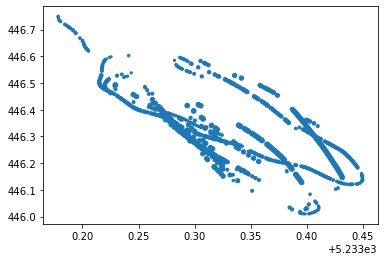

In [29]:
plt.scatter(merged_df1['1_Latitude'].dropna(), merged_df1['1_Longitude'].dropna(), merged_df1['1_Snelheid over de grond in km/h'].dropna())

In [6]:
#filter snelheid onder de 0 eruit
merged_df1 = merged_df1[merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] > 0]

#snelheid boven de 30 eruit
merged_df1 = merged_df1[merged_df1['1_Snelheid tenopzichte van het water in Kilometers per uur'] < 20]

#filter eruit alles acceleraties met .diff() die groter zijn dan 0.1
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'].diff() < 0.1]

#acceleraties boven de -0.1 eruit
merged_df1 = merged_df1[merged_df1['1_Snelheid over de grond in km/h'].diff() > -0.1]

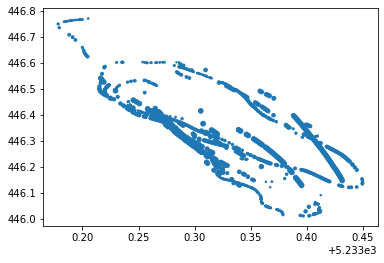

In [8]:
plt.scatter(merged_df1['1_Latitude'].dropna(), merged_df1['1_Longitude'].dropna(), merged_df1['1_Snelheid over de grond in km/h'].dropna())

In [8]:
#data["8_VESC input vermogen (W)"] = data['8_VESC input current (A)']*data['8_VESC input voltage (V)']
#data["7_Acceleratie boot tov grond"] = data["7_Snelheid over de grond in km/h"].diff()
#data["7_Acceleratie boot tov water"] = data["7_Snelheid tenopzichte van het water in Kilometers per uur"].diff()

In [44]:
def calculate_theoretical_distance(data, mass_kg=1000):
    """
    Calculate the theoretical distance assuming no resistances, using total energy available.
    
    Parameters:
    - data: DataFrame containing energy data.
    - mass_kg: Mass of the boat in kg (default is 1000 kg).
    
    Returns:
    - DataFrame with theoretical cumulative distance over time.
    """
    total_energy = data['VESC input vermogen (W)'].cumsum()
    total_energy = total_energy.fillna(0).clip(lower=0)  # Ensure no NaN or negative energy values
    
    # Calculate theoretical speed using E = 1/2 * m * v^2 -> v = sqrt(2 * E / m)
    data['Theoretical Speed (m/s)'] = np.sqrt(2 * total_energy / mass_kg)
    data['Theoretical Speed (m/s)'] = data['Theoretical Speed (m/s)'].fillna(0)  # Replace NaN values with 0
    
    # Calculate theoretical cumulative distance as speed * time interval
    data['Theoretical Distance (m)'] = data['Theoretical Speed (m/s)'].cumsum()
    return data

In [45]:
def bereken_snelheden(df, kolom_wattage,begin_snelheid = 0.01, massa=500, eta=0.7, rho_water=1000, Cd_water=0.3, A_water=0.6, rho_lucht=1.225, Cd_lucht=0.1, A_lucht=0.8, dt=1):
    """
    Bereken de snelheid van een boot op basis van een variabel vermogen.

    Parameters:
    df (pd.DataFrame): DataFrame met daarin de vermogensgegevens.
    kolom_wattage (str): Naam van de kolom die het vermogen (in watt) bevat.
    massa (float): Massa van de boot in kg (default: 500).
    eta (float): Efficiëntie van het voortstuwingssysteem (default: 0.7).
    rho_water (float): Dichtheid van water in kg/m³ (default: 1000).
    Cd_water (float): Weerstandscoëfficiënt voor water (default: 0.7).
    A_water (float): Nat oppervlak van de boot in m² (default: 3).
    rho_lucht (float): Dichtheid van lucht in kg/m³ (default: 1.225).
    Cd_lucht (float): Weerstandscoëfficiënt voor lucht (default: 1.0).
    A_lucht (float): Frontaal oppervlak van de boot in m² (default: 1.5).
    dt (float): Tijdsinterval in seconden (default: 0.1).

    Returns:
    pd.DataFrame: DataFrame met een extra kolom 'theoretische snelheid met weerstand' die de snelheid (in m/s) over de tijd bevat.
    """
    # Bereken de weerstandsfactor k op basis van de gegeven parameters
    k = 0.5 * (rho_water * Cd_water * A_water + rho_lucht * Cd_lucht * A_lucht)

    # Zorg ervoor dat de snelheid kolom wordt aangemaakt en initialiseer de eerste waarde
    snelheden = np.zeros(len(df))
    snelheden[0] = begin_snelheid  # Beginwaarde voor snelheid om deling door nul te vermijden

    # Iteratieve berekening van de snelheid voor elke tijdstap
    for i in range(1, len(df)):
        P_motor = df.iloc[i][kolom_wattage]
        v_oud = snelheden[i-1]
        
        if P_motor > 0 and v_oud > 0:
            F_aandrijving = (P_motor * eta) / v_oud
        else:
            F_aandrijving = 0
        
        F_weerstand = k * v_oud**2
        a = (F_aandrijving - F_weerstand) / massa
        snelheden[i] = v_oud + a * dt
        if snelheden[i] < 0:
            snelheden[i] = 0  # Snelheid kan niet negatief zijn

    # Voeg de snelheden toe aan de oorspronkelijke DataFrame
    df['theoretische snelheid met weerstand'] = snelheden
    return df

In [46]:
data_new = calculate_theoretical_distance(data_new)
data_new = bereken_snelheden(data_new, 'VESC input vermogen (W)')
data_new["Verschil snelheid grond en theoretisch"]= data_new["Snelheid over de grond in km/h"]-data_new['theoretische snelheid met weerstand']*3.6
data_new["Verschil snelheid water en theoretisch"]= data_new["Snelheid tenopzichte van het water in Kilometers per uur"]-data_new['theoretische snelheid met weerstand']*3.6

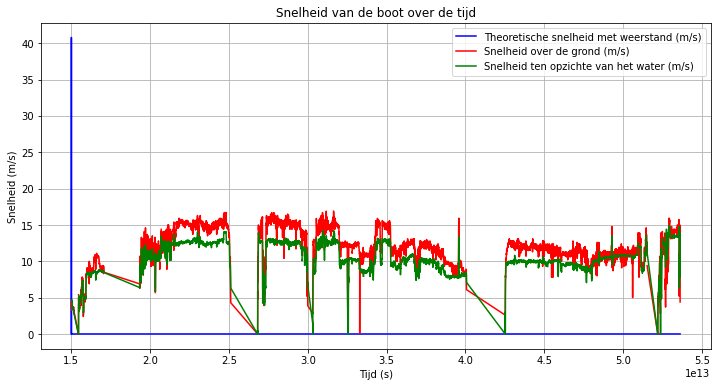

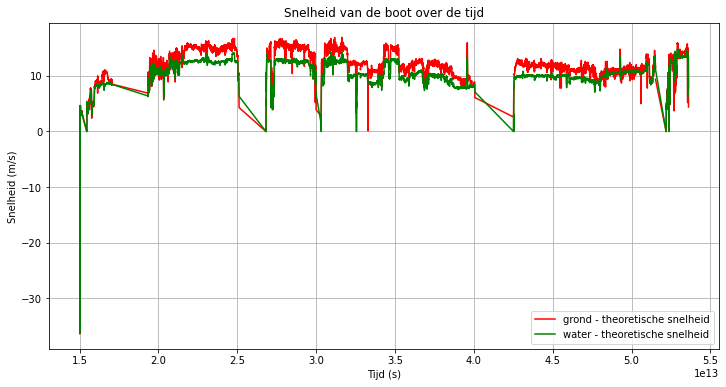

In [48]:
plt.figure(figsize=(12, 6))

# Plot de theoretische snelheid met weerstand
plt.plot(data_new.index, data_new['theoretische snelheid met weerstand']*3.6, label='Theoretische snelheid met weerstand (m/s)', color='b')

# Plot de snelheid over de grond
plt.plot(data_new.index, data_new['Snelheid over de grond in km/h'], label='Snelheid over de grond (m/s)', color='r')

# Plot de snelheid ten opzichte van het water
plt.plot(data_new.index, data_new['Snelheid tenopzichte van het water in Kilometers per uur'], label='Snelheid ten opzichte van het water (m/s)', color='g')

plt.xlabel('Tijd (s)')
plt.ylabel('Snelheid (m/s)')
plt.title('Snelheid van de boot over de tijd')
plt.legend()
plt.grid(True)
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(data_new.index, data_new["Verschil snelheid grond en theoretisch"], label='grond - theoretische snelheid', color='r')
plt.plot(data_new.index,data_new['Verschil snelheid water en theoretisch'] , label='water - theoretische snelheid', color='g')
plt.xlabel('Tijd (s)')
plt.ylabel('Snelheid (m/s)')
plt.title('Snelheid van de boot over de tijd')
plt.legend()
plt.grid(True)
plt.show()

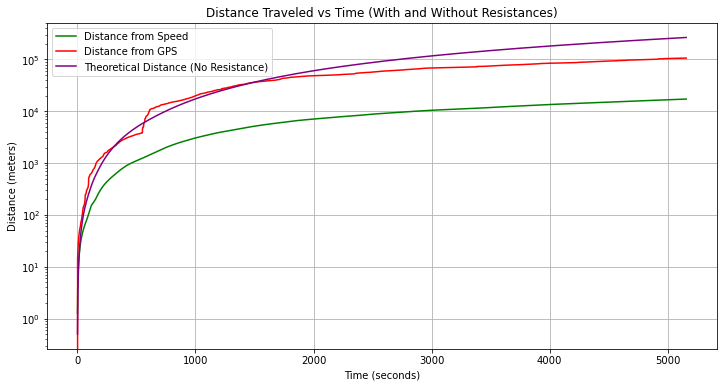

In [114]:
# Plotting distance traveled versus time for the four distance calculations
time = range(len(data_new))

plt.figure(figsize=(12, 6))

# Plot distance versus time
plt.plot(time, data_new['Cumulative Distance from Speed (m)'], label='Distance from Speed', color='green')
plt.plot(time, data_new['Cumulative Distance from GPS (m)'], label='Distance from GPS', color='red')
plt.plot(time, data_new['Theoretical Distance (m)'], label='Theoretical Distance (No Resistance)', color='purple', linestyle='-')
#plt.plot(time, data_new['Theoretical Distance with Resistance (m)'], label='Theoretical Distance with Resistance', color='blue', linestyle='--')

plt.xlabel('Time (seconds)')
plt.ylabel('Distance (meters)')
plt.title('Distance Traveled vs Time (With and Without Resistances)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()